# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных 

In [1]:
#импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
#считываем файл в переменную real_estate и выводим первые пять строк на экран
try:
    real_estate = pd.read_csv('datasets/real_estate_data.csv', sep='\t')
except:
    real_estate = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

real_estate_raw = real_estate.copy(deep=True)
real_estate.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1          11.0      2.0   посёлок Шушары           12817.0   
2           8.3      0.0  Санкт-Петербург           21741.0   
3           NaN      0.0  Санкт-Петербург           28098.0   
4          41.0      NaN  Санкт-Петербург           31856.0   

  cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0             16028.0               1.0          482.0               2.0   
1             18603.0               0.0            NaN               0.0   
2             13933.0               1.0           90.0               2.0   
3              6800.0               2.0           84.0               3.0   
4              8098.0               2.0          112.0               1.0   

   ponds_nearest  days_exposition  
0          755.0              NaN  
1            NaN             81.0  
2          574.0            558.0  
3          234.0            424.0  
4           48.0            121.0  

[5 rows x 22 columns]

In [3]:
#изучаем информацию о содержимом данных
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
#посмотрим количество уникальных значений в каждом столбц
real_estate.nunique().sort_values()

studio                     2
open_plan                  2
is_apartment               2
ponds_around3000           4
parks_around3000           4
balcony                    6
rooms                     17
floor                     33
floors_total              36
total_images              38
ceiling_height           183
locality_name            364
kitchen_area             971
parks_nearest            995
ponds_nearest           1096
days_exposition         1141
first_day_exposition    1491
living_area             1782
total_area              2182
last_price              2978
cityCenters_nearest     7642
airports_nearest        8275
dtype: int64

In [5]:
#просмотрим некоторые значения столбцов
row = ['rooms', 'floors_total', 'floor', 'is_apartment', 'studio', 'open_plan', 'balcony', 'parks_around3000', 'ponds_around3000']
for element in row:
    print(element, ':', sorted(real_estate[element].unique()))

rooms : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 19]
floors_total : [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, nan, 28.0, 29.0, 33.0, 34.0, 35.0, 36.0, 37.0, 52.0, 60.0]
floor : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
is_apartment : [nan, False, True]
studio : [False, True]
open_plan : [False, True]
balcony : [nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
parks_around3000 : [0.0, 1.0, 2.0, nan, 3.0]
ponds_around3000 : [0.0, 1.0, 2.0, 3.0, nan]


In [6]:
#проверим явные дубликаты
real_estate.duplicated().sum()

0

### Вывод

В нашем распоряжении 23699 записей об объектах в Санкт-Петербурге и области - объем выборки достаточно большой. </br>
</b>
Больше половины столбцов заполнено с пропусками, нужно изучить и восстановить их по возможности.</br>
</br>
В некоторых столбцах тип данных не соответствует содержимому - например, floors_total имеет тип float, хотя все значения целочисленные. Некоторые столбцы с булевыми значениями имеют тип object - скорее всего, это ввязано с наличием пропусков и решится после их заполнения.</br>
</br>
В датасете нет дубликатов и очевидных ошибок вроде отрицательных значений, но некоторые столбцы требуют более пристального изучения - например, среди количества комнат встречается 0. Это может быть как ошибкой, так и данными о квартирах-студиях.</br>
</br>
Столбец с данными о локализации объекта может содержать неявные дубликаты - это тоже необходимо проверить.</br>

## Предобработка данных

Заполним столбцы **is_appartment** и **balcony**.</br>
Аппартаменты - это особый тип недвижимости и если владелец не указал его, скорее всего он вообще не в курсе, что это такое, и его квартира не пренадлежит к данной категории. Поэтому заполним пропуски значением False.</br>
Наличие балкона (или нескольких) обычно прибавляет стоимость недвижимости и если владелец их не указал, скорее всего балкона просто нет. Заполним пропуски значением 0.</br>

In [7]:
real_estate['is_apartment'] = real_estate['is_apartment'].fillna(False)
real_estate['balcony'] = real_estate['balcony'].fillna(0)

Пропусков в столбцах **locality_name** и **floors_total** немного, а адекватно экстраполировать эти параметры сложно. </br>
Убедимся, что эти строки занимают менее процента от объема датасета и удалим их. </br>

In [8]:
print(
    (len(real_estate) - real_estate['locality_name'].count() 
     + len(real_estate) - real_estate['floors_total'].count())
    /len(real_estate)
)

real_estate.dropna(subset=['floors_total'], inplace=True)
real_estate.dropna(subset=['locality_name'], inplace=True)

0.005696442887885565


Разберёмся с квартирами с нулём комнат

In [9]:
print('Квартир с нулём комнат:', real_estate[real_estate['rooms'] == 0]['rooms'].count())
print('Квартир-студий:', real_estate[real_estate['studio'] == True]['studio'].sum())
print('Студии/ не студии среди квартир с 0 комнат:' )
real_estate[real_estate['rooms'] == 0]['studio'].value_counts()

Квартир с нулём комнат: 194
Квартир-студий: 146
Студии/ не студии среди квартир с 0 комнат:


True     135
False     59
Name: studio, dtype: int64

In [10]:
#в датасете есть такой параметр, как open_plan, т.е. свободная планировка. 
#проверим, возможно "нулевые" комнаты предполагают именно это
#заодно проверим, сколько всего квартир со свободной планировкой

print('Квартиры с нулём комнат и свободной планировкой:', real_estate[(real_estate['rooms'] == 0) & (real_estate['open_plan'] == True)]['open_plan'].count())
print('Всего квартир со свободной планировкой:', real_estate[real_estate['open_plan'] == True]['open_plan'].count())

Квартиры с нулём комнат и свободной планировкой: 59
Всего квартир со свободной планировкой: 67


In [11]:
#варианты по числу комнат для квартир со свободной планировкой - видимо там, где число комнат указано, планировка уже есть
real_estate[real_estate['open_plan'] == True]['rooms'].value_counts()

0    59
1     3
3     2
2     1
4     1
5     1
Name: rooms, dtype: int64

Получается, что квартиры со значением комнат = 0 - это либо студии, либо квартиры со свободной планировкой, в которых самой планировки как таковой еще нет. Оставим это значение как есть и будем иметь ввиду, что оно подразумевает такие особенности.

**Изменение типов данных**</br>
Поменяем тип данных для целочисленных объектов, отбросим копейки из цены и изменим формат даты.

In [12]:
real_estate['balcony'] = real_estate['balcony'].astype('int64')
real_estate['floors_total'] = real_estate['floors_total'].astype('int64')
real_estate['last_price'] = real_estate['last_price'].astype('int64')

In [13]:
#при изменении фомата даты округлим её до дней - в нашем исследовании точное время публикации не существенно
real_estate['first_day_exposition'] = (
    pd.to_datetime(real_estate['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
    .dt.round('1D')
)

**Ищем дубликаты в населённых пунктах**

In [14]:
real_estate['locality_name'].nunique()

364

Перебирать 363 названия и сравнивать между собой в поисках неявных дубликатов - очень ёмкая и, возможно, не очень нужная работа. </br>
Для чего могут потребоваться названия населённых пунктов? Например, для оценки стоимости жилья в этих насёленных пунтках, в различных районах Ленинградской области, в зависимости от удаленности от Санкт-Петербурга. </br>
Для такой оценки требуется определенный объем выборки - вряд ли оценка, сделанная по 2-3-4 квартирам окажется адекватной.</br>
</br>
Выберем для работы те населённые пункты, в которых продается 100 и более квартир. Получим их названия, создадим список индексов с названиями пунктов без приставок "село", "посёлок" итд и проверим, встречаются ли эти названия в датасете.</br>
Поменяем значения в locality_name там, где наличие неявных дубликатов очевидно. Например "посёлок" или "поселок" - это дубликат, а вот Кингисепп и посёлок Кингисеппский - два разных населённых пункта.</br>

In [15]:
#для удобства приведём все названия к нижнему регистру
real_estate['locality_name'] = real_estate['locality_name'].str.lower()

locality_names_count = real_estate['locality_name'].value_counts()
print('Населённые пункты, в которых продаётся 100 и более квартир:')
display(locality_names_count.index[locality_names_count >= 100])

#создадим переменную для проверки дубликатов
locality_names_index = ['санкт-петербург', 'мурино', 'шушары', 'всеволожск',
       'пушкин', 'колпино', 'парголово', 'гатчина', 'кудрово',
       'выборг', 'петергоф', 'сестрорецк', 'красное село', 
       'новое девяткино', 'сертолово', 'ломоносов', 'кириши', 'сланцы',
       'волхов', 'тосно', 'кингисепп']

locality_names_data = real_estate['locality_name']

print()
print('Проверяем неявные дубликаты:')
for element in locality_names_index:
    print(element, ':', locality_names_data[locality_names_data.str.contains(element)].unique())

Населённые пункты, в которых продаётся 100 и более квартир:


Index(['санкт-петербург', 'посёлок мурино', 'посёлок шушары', 'всеволожск',
       'пушкин', 'колпино', 'посёлок парголово', 'гатчина', 'деревня кудрово',
       'выборг', 'петергоф', 'сестрорецк', 'красное село', 'кудрово',
       'деревня новое девяткино', 'сертолово', 'ломоносов', 'кириши', 'сланцы',
       'волхов', 'тосно', 'кингисепп'],
      dtype='object')


Проверяем неявные дубликаты:
санкт-петербург : ['санкт-петербург']
мурино : ['посёлок мурино' 'поселок мурино' 'мурино']
шушары : ['посёлок шушары']
всеволожск : ['всеволожск']
пушкин : ['пушкин']
колпино : ['колпино']
парголово : ['посёлок парголово']
гатчина : ['гатчина']
кудрово : ['деревня кудрово' 'кудрово']
выборг : ['выборг']
петергоф : ['петергоф']
сестрорецк : ['сестрорецк']
красное село : ['красное село']
новое девяткино : ['деревня новое девяткино']
сертолово : ['сертолово']
ломоносов : ['ломоносов']
кириши : ['кириши']
сланцы : ['сланцы']
волхов : ['волхов']
тосно : ['тосно']
кингисепп : ['кингисепп' 'поселок кингисеппский']


In [16]:
#определим функцию для замены неявных дубликатов
def replace_locality_duplicates(dataset, column, duplicate_localities, correct_locality):
    for duplicate_value in duplicate_localities:
        dataset[column] = dataset[column].replace(duplicate_value, correct_locality)

In [17]:
#заменим дубликаты
duplicate_localities = ['поселок мурино', 'мурино']
correct_locality = 'посёлок мурино'
replace_locality_duplicates(real_estate, 'locality_name', duplicate_localities, correct_locality)

duplicate_localities = ['кудрово']
correct_locality = 'деревня кудрово'
replace_locality_duplicates(real_estate, 'locality_name', duplicate_localities, correct_locality)

In [18]:
#проверяем явные дубликаты, которые могли появиться после изменения населённых пунктов
real_estate.duplicated().sum()

0

In [19]:
#на следующем шаге будем заполнять объемные пропуски - сделаем копию датасета, чтобы иметь возможность сравнивать
real_estate_copy = real_estate.copy()

**Восстанавливаем параметры квартир - жилая площадь, площадь кухни, потолки** </br>

Важными характеристиками квартиры являются жилая площадь и площадь кухни. В столбцах с этими параметрами - около 2000 пропусков в каждом. Попробуем заполнить их, исходя из характеристик квартир с аналогичным количеством комнат.</br>
Добавим в датасет два столбца - отношение жилой площади к общей и отношение площади кухни к общей площади квартиры. Для групп квартир с разным количеством комнат посчитаем медианы и заполним ими пропуски в соответствующих группах. А затем - посчитаем значения для пропусков в столбцах **living_area** и **kitchen_area**.</br>
</br>
В столбце "высота потолков" **ceiling_height** оставим всё, как есть: во-первых, пропусков слишком много, во-вторых достаточно сложно придумать правдоподобный алгоритм предсказания высоты помещений, особенно в городе с такой нестандартной и разнообразной архитектурой, как Санкт-Петербург.

In [20]:
#посчитаем отношение жилой площади и размера кухни к общей площади
real_estate['living_area_ratio'] = real_estate['living_area']/real_estate['total_area']
real_estate['kitchen_area_ratio'] = real_estate['kitchen_area']/real_estate['total_area']

In [21]:
#проверим, что в датасете нет ошибочных строк, в которых площадь жилой части или кухни окажется больше всей квартиры
print(real_estate[real_estate['living_area_ratio'] > 1]['living_area_ratio'].count())
print(real_estate[real_estate['kitchen_area_ratio'] > 1]['kitchen_area_ratio'].count())

0
0


In [22]:
#проходим циклом по группам с разным количеством комнат 
#и для каждой группы считаем медиану для отношения жилой площади к общей и площади кухни к общей

for element in real_estate['rooms'].unique():
    living_area_ratio_median = real_estate[real_estate['rooms'] == element]['living_area_ratio'].dropna().median()
    kitchen_area_ratio_median = real_estate[real_estate['rooms'] == element]['kitchen_area_ratio'].dropna().median()
    print(element, living_area_ratio_median, kitchen_area_ratio_median)
    
    #восстанавливаем пропуски в столбцах living_area_ratio и kitchen_area_ratio
    real_estate.loc[real_estate['rooms'] == element, 'living_area_ratio'] = (
        real_estate.loc[real_estate['rooms'] == element, 'living_area_ratio']
        .fillna(living_area_ratio_median)
        )
    real_estate.loc[real_estate['rooms'] == element, 'kitchen_area_ratio'] = (
        real_estate.loc[real_estate['rooms'] == element, 'kitchen_area_ratio']
        .fillna(kitchen_area_ratio_median)
        )

3 0.6318327974276526 0.12849622191748042
1 0.4826376811594203 0.24777911164465788
2 0.5854700854700855 0.1610337972166998
4 0.659789092958805 0.11224489795918367
5 0.6518423782149324 0.10538641686182669
6 0.6795085139318886 0.09885265584784678
0 0.689655172413793 nan
7 0.6816702819956616 0.08371748607663587
11 0.7100928114264657 0.0668546285257222
8 0.6884754302364403 0.1091703056768559
14 0.6486946594192649 0.07563599991917395
10 0.6531034482758621 0.09162424803331791
15 0.6932203389830508 0.1694915254237288
9 0.6282513005202081 0.04961984793917567
19 0.7060864922584089 0.07367859049652963
16 0.6666666666666666 0.04814814814814815
12 0.4552222222222222 0.12444444444444444


In [23]:
#восстанавливаем пропуски в столбцах living_area и kitchen_area, умножая полученные соотношения на общую площадь
real_estate['living_area'].fillna(real_estate['total_area']*real_estate['living_area_ratio'], inplace=True)
real_estate['kitchen_area'].fillna(real_estate['total_area']*real_estate['kitchen_area_ratio'], inplace=True)

#выведем первые пять строк так, чтобы было видно столбцы с жилой площадью и кухнями
#в строке с индексом 3 были пропуски - и они заполнены
#а в строке с индексом 4 - аномально большая кухня! И это хороший довод за использование медианы.
real_estate.loc[:4, :'kitchen_area']

total_images  last_price  total_area first_day_exposition  rooms  \
0            20    13000000       108.0           2019-03-07      3   
1             7     3350000        40.4           2018-12-04      1   
2            10     5196000        56.0           2015-08-20      2   
3             0    64900000       159.0           2015-07-24      3   
4             2    10000000       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
0            2.70            16    51.000000      8         False   False   
1             NaN            11    18.600000      1         False   False   
2             NaN             5    34.300000      4         False   False   
3             NaN            14   100.461415      9         False   False   
4            3.03            14    32.000000     13         False   False   

   open_plan  kitchen_area  
0      False     25.000000  
1      False     11.000000  
2      False      8.300000  
3      False     20.430899  
4      False     41.000000

In [24]:
#проверим число пропусков в обработанных столбцах
#обнаружим 135 пропусков в кухнях и убедимся, что всё это - студии (скорее всего хозяева студии просто пропускают этот пункт)

print('Число пропусков в столбцах living_area и kitchen_area:', real_estate['living_area'].isna().sum(), real_estate['kitchen_area'].isna().sum())
print('Число студий в строках с пропусками в kitchen_area:', real_estate[(real_estate['kitchen_area'].isna()) & (real_estate['studio'] == True)]['total_area'].count())

#в целом студии - это отдельная категория без полноценной кухни, поэтому для них заполним данные о площади кухни нулями
#предварительно убедившись, что больше в датасете нулевых значений нет

print('Число нулей в kitchen_area до заполнения пропусков для студий:', real_estate[real_estate['kitchen_area'] == 0]['total_area'].count())
real_estate['kitchen_area'].fillna(0, inplace=True)
real_estate['kitchen_area_ratio'].fillna(0, inplace=True)

Число пропусков в столбцах living_area и kitchen_area: 0 194
Число студий в строках с пропусками в kitchen_area: 135
Число нулей в kitchen_area до заполнения пропусков для студий: 0


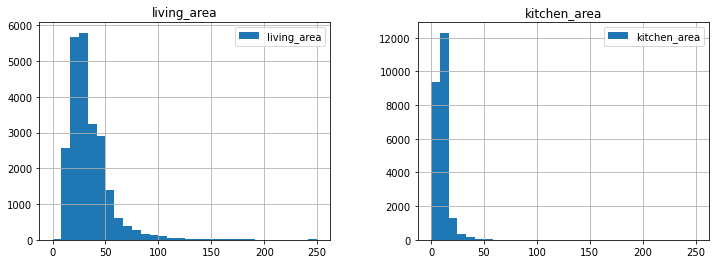

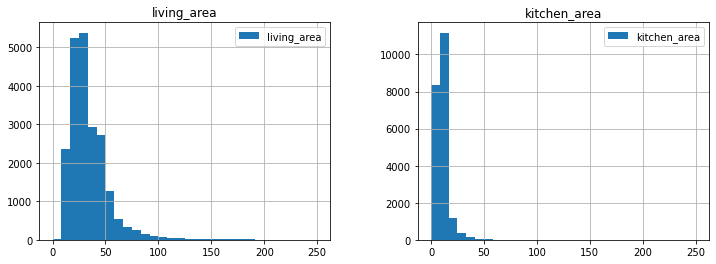

In [25]:
#сравним гистограммы для обработанных столбцов и необработанных из real_estate_raw, 
#убедимся, что форма распределения не меняется (пики становятся выше) и в целом медиана подходит

real_estate.hist(['living_area', 'kitchen_area'], bins=30, range=(0, 250), figsize=(12, 4), legend=True);
real_estate_copy.hist(['living_area', 'kitchen_area'], bins=30, range=(0, 250), figsize=(12, 4), legend=True);

**Разбираемся с парками, водоёмами, аэропортами и длительностью объявлений**</br>

У нас есть ряд параметров, полученных автоматически:</br>
**airports_nearest**: 18157 значений, тип float64   </br>    
**cityCenters_nearest**: 18033 значений, тип float64   </br>    
**parks_around3000**: 18034 значений, тип  float64   </br>    
**parks_nearest**:  8021 значений, тип float64   </br>   
**ponds_around3000**: 18034 значений, тип float64   </br>  
**ponds_nearest**: 9015 значений, тип float64   </br>
**days_exposition**: 20335 значений, тип  float64 </br>
Скорее всего пропуски в колонках связаны с особенности автозаполнения: например, расстояния до ближайшего парка и водоёма заполняются только для тех случаев, когда парк/водоем находится в пределах 3000 км (проверим это ниже).</br> 
Что касается длительности продажи - вероятно столбцы с пропусками - это объекты, которые еще не были проданы на момент выгрузки базы.</br>
Пытаться заполнить пропуски нет смысла - дополнительной информации у нас нет.</br>
Эти данные будем анализировать as is, если бы речь шла об актуальных данных, а не архивных - имело бы смысл отправить баг-репорт менеджеру.</br>

In [26]:
#число объявлений рядом с парками и прудами (т.е. != 0) примерно равно числу заполненных значений в колонках 
#parks_nearest и ponds_nearest - т.е., расстояния заполняются системой только когда водоем или парк оказываются в радиусе 3 км

print(real_estate['parks_around3000'].value_counts())
print('Количество объявлений возле парков:', real_estate[real_estate['parks_around3000'] != 0]['parks_nearest'].count())
print(real_estate['ponds_around3000'].value_counts())
print('Количество объявлений возле водоёмов:', real_estate[real_estate['ponds_around3000'] != 0]['ponds_nearest'].count())

0.0    10039
1.0     5647
2.0     1736
3.0      643
Name: parks_around3000, dtype: int64
Количество объявлений возле парков: 8026
0.0    9029
1.0    5662
2.0    1883
3.0    1491
Name: ponds_around3000, dtype: int64
Количество объявлений возле водоёмов: 9036


In [27]:
### КОД РЕВЬЮЕРА ###
float("NaN") != 0

True

In [28]:
real_estate.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
living_area_ratio              float64
kitchen_area_ratio             float64
dtype: object

## Расчёты и добавление результатов в таблицу

Мы уже добавили в таблицу соотношение жилой площади к общей площади и площади кухни к общей.</br>
Добавим также:</br>
    - цену квадратного метра (сразу округлим до целочисленного значения);</br>
    - день недели, месяц и год публикации объявления;</br>
    - категорию этажа: первый, последний, другой.</br>

In [29]:
real_estate['square_meter_price'] = (real_estate['last_price']/real_estate['total_area']).astype('int64')

In [30]:
real_estate['day_of_week'] = real_estate['first_day_exposition'].dt.day_name()

In [31]:
real_estate['month'] = real_estate['first_day_exposition'].dt.month
real_estate['year'] = real_estate['first_day_exposition'].dt.year

In [32]:
def floor_category(floor, floors_total):
    #floor, floors_total = floor_info
    #print(floor_info[0])
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

In [33]:
real_estate['floor_category'] = real_estate.apply(lambda x: floor_category(x.floor, x.floors_total), axis=1)

In [34]:
#посмотрим, что получилось в итоге
real_estate.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20    13000000       108.0           2019-03-07      3   
1             7     3350000        40.4           2018-12-04      1   
2            10     5196000        56.0           2015-08-20      2   
3             0    64900000       159.0           2015-07-24      3   
4             2    10000000       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70            16    51.000000      8         False  ...   
1             NaN            11    18.600000      1         False  ...   
2             NaN             5    34.300000      4         False  ...   
3             NaN            14   100.461415      9         False  ...   
4            3.03            14    32.000000     13         False  ...   

   ponds_around3000  ponds_nearest  days_exposition  living_area_ratio  \
0               2.0          755.0              NaN           0.472222   
1               0.0            NaN             81.0           0.460396   
2               2.0          574.0            558.0           0.612500   
3               3.0          234.0            424.0           0.631833   
4               1.0           48.0            121.0           0.320000   

  kitchen_area_ratio  square_meter_price  day_of_week  month  year  \
0           0.231481              120370     Thursday      3  2019   
1           0.272277               82920      Tuesday     12  2018   
2           0.148214               92785     Thursday      8  2015   
3           0.128496              408176       Friday      7  2015   
4           0.410000              100000      Tuesday      6  2018   

   floor_category  
0          другой  
1          первый  
2          другой  
3          другой  
4          другой  

[5 rows x 29 columns]

## Исследовательский анализ данных

### Исследуем разнообразие предложений: площадь, количество комнат, высоту потолков и цены

Изучение этих параметров даст основное представление о многообразии рынка: каких предложений много, каких мало, какие совсем редки. Какие близки к "среднему", а какие чуть выше/ниже или выбиваются совсем.

In [35]:
real_estate.loc[:, ['total_area', 'rooms', 'ceiling_height']].describe().round(2)

total_area     rooms  ceiling_height
count    23565.00  23565.00        14481.00
mean        60.32      2.07            2.77
std         35.66      1.08            1.26
min         12.00      0.00            1.00
25%         40.00      1.00            2.51
50%         52.00      2.00            2.65
75%         69.70      3.00            2.80
max        900.00     19.00          100.00

Если в квартиру площадью 12 и 900 кв.м. как-то можно поверить, то метровые и стометровые потолки - это вряд ли. Квартиры с нулём комнат мы обнаружили и изучили выше - это студии и свободные планировки.</br>
В целом же видим, что основная масса продаж - это 1, 2 и 3 комнатные квартиры с площадью примерно от 50 до 70 кв.м. и относительно "стандартными" потолками 2,5 - 2,8 м (хотя по некоторым источникам 2,8 м уже считаются высокими).</br>

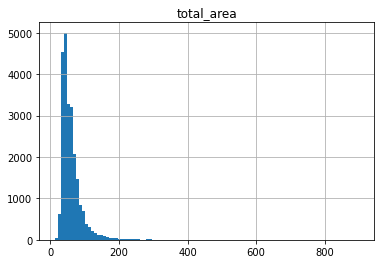

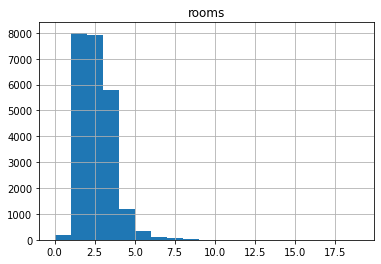

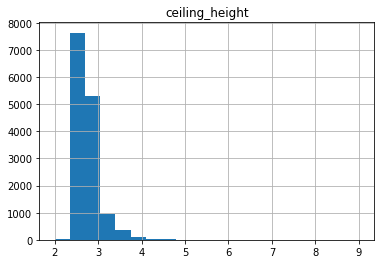

In [36]:
#посмотрим на гистограммы этих параметров
real_estate.hist('total_area', bins=100);
real_estate.hist('rooms', bins=19);
real_estate.hist('ceiling_height', bins=20, range=(2, 9));

Каждая гистограмма имеет "хвост" в область больших значений, затрудняющий визуальный анализ основной массы данных.</br>
В случае общей площади и числа комнат речь идёт, скорее всего, о больших многокомнатных квартирах, которые имеют узкий спрос и предложение. В случае потолков - налицо ошибка в данных.</br>
Построим новые гистрограммы, отбросив хвосты: ограничим площадь квартир цифрой 150 кв.м., количество комнат - 9, высоту потолков - от 2 до 4 м. 

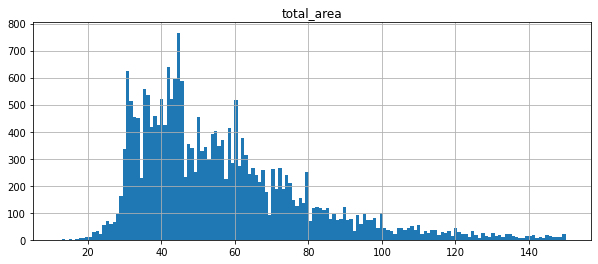

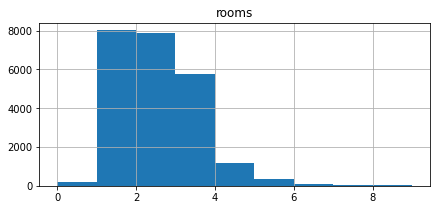

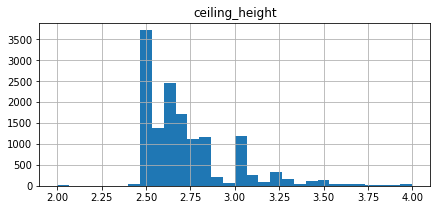

In [37]:
real_estate.query('total_area <= 150').hist('total_area', bins=150, figsize=(10,4));
real_estate.query('rooms <= 9').hist('rooms', bins=9, figsize=(7, 3));
real_estate.query('ceiling_height >= 2 and ceiling_height <= 4').hist('ceiling_height', bins=30, figsize=(7, 3));

**Площадь квартиры:** половина предложений приходится на квартиры до 52 кв.м. Пики предложений - в районе 45 и 42 кв.м., а также среди малогабаритных квартир площадью около 30 кв.м. Есть заметное количество предложений в диапазоне от 50 до 80 кв.м., уже меньше - в диапазоне от 80 до 100 кв.м. Квартиры площадью от 100 до 300 кв.м. - несколько сотен предожений в совокупности. Более 300 кв.м. - единичные предложения.</br>
</br>
Стоит отметить, что не только среднее (60 кв.м), но даже медиана (52 кв.м) не совпадает с основным пиком предложения в районе 45 кв.м. Это значит, что рынок имеет достаточно тяжёлый и растянутый хвост в виде большого количества крупногабаритных квартир. Распределение, описывающиее площади квартир, по своим параметрам находится ближе к логарифмически-нормальному.</br>
Если рассмотреть срез по 1- и 2-х комнатным квартирам (ниже), то медиана фактически совпадет с пиком предложения по площади. Возможно, при более детальном анализе стоит рассматривать площадь квартир по группам: 1-2 комнаты, 3-5 комнат, 6 и более</br>
</br>
**Количество комнат:** разброс по комнатам близок к распределению Пуассона. Львиная доля предложения приходится на 1 и 2 комнатные квартиры. На трёхкомнатные квартиры приходится чуть больше трети совокупного объема "однушек" и "двушек". Четырехкомнатных - чуть больше тысячи. Пять комнат и больше - небольшое количество предложений. Также видно, что студии (0 комнат) занимают очень маленький объем от общего объема рынка.</br>
</br>
**Высота потолков:** пики приходятся на "стандартные" высоты 2,5 и 2,7 м, большинство предложений - с высотой до 2,8 м - если не считать пика на значении 3 м - скорее всего, эта часть приходится на "сталинки", в которых высота потолков была не ниже 3 м.

In [38]:
#статистика для 1-2 комнатных квартир
real_estate.query('rooms <= 2')['total_area'].describe().round(2)

count    16095.00
mean        46.46
std         14.87
min         12.00
25%         36.00
50%         44.00
75%         53.90
max        494.10
Name: total_area, dtype: float64

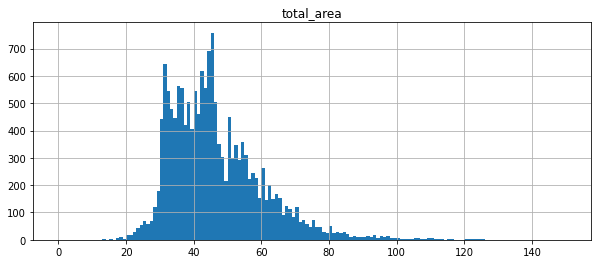

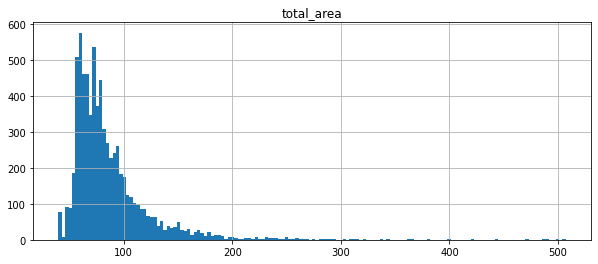

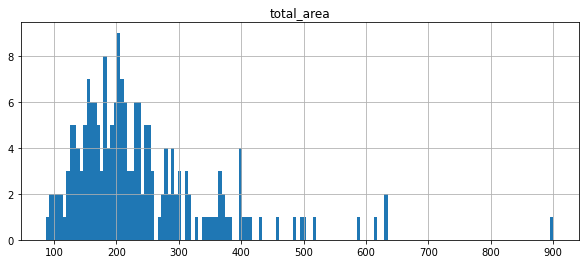

In [39]:
#распределения площадей по группам квартир - 1-2, 3-5, 6 и больше
real_estate.query('rooms <= 2').hist('total_area', bins=150, range= (0, 150), figsize=(10,4));
real_estate.query('rooms in [3, 4, 5]').hist('total_area', bins=150, figsize=(10,4));
real_estate.query('rooms >= 6').hist('total_area', bins=150, figsize=(10,4));

При таком разбиении видно, что площадь 1-2 комнатных квартир лежит преимущественно между 30 и 60 кв.м., а 3-5 комнатных - между 50-ю и 90 кв.м. (можно предположить, что с увеличением количества комнат они становятся мельче). Площадь совсем многокомнатных квартир - от 6 и выше - начинает от 100 кв.м. и таких предложений очень мало.

In [40]:
#посмотрим информацию о ценах - абсолютных и относительных
display(real_estate['last_price'].describe().apply("{0:.0f}".format))
real_estate['square_meter_price'].describe().apply("{0:.0f}".format)

count        23565
mean       6540058
std       10910935
min          12190
25%        3400000
50%        4646000
75%        6790000
max      763000000
Name: last_price, dtype: object

count      23565
mean       99405
std        50389
min          111
25%        76566
50%        95000
75%       114213
max      1907500
Name: square_meter_price, dtype: object

In [41]:
#квартира в Питере за 12190? Возможно, в базу попал домик для Барби.
#на деле всё прозаичнее - скорее всего владелец забыл дописать нолики при заполнении данных: так и получилась эта аномалия.
display(real_estate.query('rooms == 19'))

total_images  last_price  total_area first_day_exposition  rooms  \
14498             6    32250000       374.6           2018-06-09     19   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
14498             NaN             5        264.5      2         False  ...   

       ponds_around3000  ponds_nearest  days_exposition  living_area_ratio  \
14498               2.0          548.0            114.0           0.706086   

      kitchen_area_ratio  square_meter_price  day_of_week  month  year  \
14498           0.073679               86091     Saturday      6  2018   

       floor_category  
14498          другой  

[1 rows x 29 columns]

**Цена квартиры:** пик в районе 4 млн., а основная масса предложений находится в диапазоне от 3 до 7 млн. При этом средняя  и медианная цена различаются почти на 200 тыс. (что еще раз говорит в пользу "тяжелого" хвоста с дорогими предложениями)</br>
А вот при расчёте цены на квадратный метр среднее и медиана  почти не отличаются - 99 и 95 тыс. соответственно, распределение по форме напоминает нормальное. Можно сделать предположение, что на питерском рынке общая площадь квартиры не оказывает существенного влияния на стоимость квадратного метра в ней.</br>
Интересно, что в столбце 90-100 тыс. есть высокий пик, а следом за ним, в столбце 101-110 тыс. - провал. При укрупнении этой области видим, что пик приходится ровно на 100.000. Возможно, так проявляет себя народная любовь к круглым числам.

## Изучаем время продажи квартир

In [43]:
real_estate['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

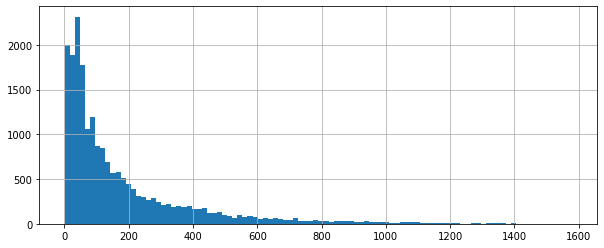

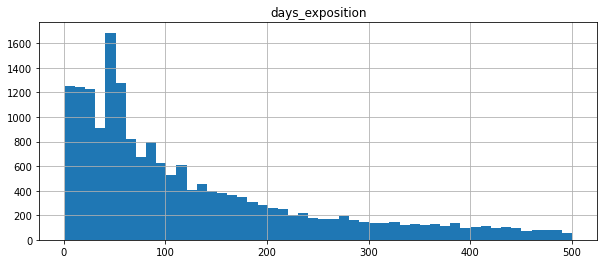

In [44]:
real_estate['days_exposition'].hist(bins=100, figsize=(10, 4));
real_estate.query('days_exposition <= 500').hist('days_exposition', bins=50, figsize=(10, 4));

На гистограме - типичное распределение Пуассона. Если укрупнить начало графика, видно, что основная масса продаж укладывается в 100-120 дней, то есть три-четыре месяца с ярко выраженным пиком в районе 45 дней (возможно, через 45 дней кончается срок бесплатной публикации и объявление просто снимают с продажи). <br>
Для оценки скорости продажи разумно ориентироваться на процентили - если квартира "ушла" менее, чем за 45 дней, продажу можно считать быстрой. Если задержалась на 230 дней и более - возможно, это повод скорректировать стоимость или сменить риэлтора.

In [45]:
#проверим, какую долю от общей массы занимают "быстрые" и "медленные" продажи
print('Доля быстрых продаж:', real_estate.query('days_exposition <= 45')['days_exposition'].count()/real_estate.query('days_exposition > 45')['days_exposition'].count())
print('Доля медленных продаж:', real_estate.query('days_exposition > 230')['days_exposition'].count()/real_estate.query('days_exposition <= 230')['days_exposition'].count())


Доля быстрых продаж: 0.33094041636755206
Доля медленных продаж: 0.33486058384605316


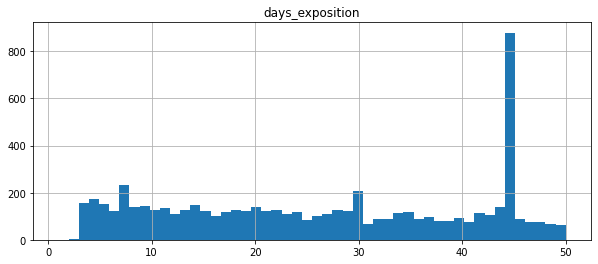

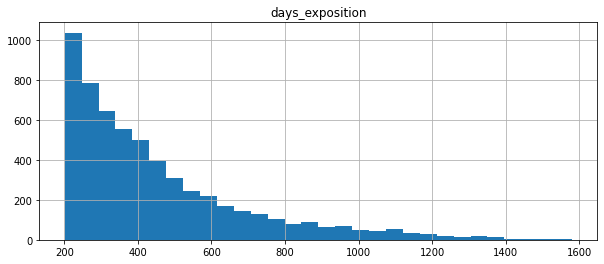

In [46]:
#приблизительная оценка оказалась не очень корректной - слишком быстрые и слишком медленные продажи занимают бОльшую часть данных.
#выведем на экран гистограммы продаж быстрее 50 дней и медленнее 200

real_estate.query('days_exposition <= 50').hist('days_exposition', bins=50, figsize=(10, 4));
real_estate.query('days_exposition > 200').hist('days_exposition', bins=30, figsize=(10, 4));

In [47]:
#каких-то очевидных вариантов для отсечки найти с помощью гистограмм не получается.
#посчитаем быстрыми продажи, которые происходят быстрее, чем 90% всех продаж квартир и медленными - 
#те, которые происходят медленнее, чем 90% всех продаж.

too_fast = int(real_estate.days_exposition.quantile(0.1))
too_slow = int(real_estate.days_exposition.quantile(0.9))


print('Слишком быстрые - это продажи быстрее, чем', too_fast, 'дней')
print('Слишком медленные - это продажи дольше, чем', too_slow, 'дней')

Слишком быстрые - это продажи быстрее, чем 17 дней
Слишком медленные - это продажи дольше, чем 459 дней


## Исследуем влияение параметров квартир на стоимость

**Удаление аномальных и выбивающихся значений**</br>
Прежде чем анализировать факторы, влияющие на стоимость, уберем из датасета аномальные значения и выбросы.</br>
Так, например, у студий и аппартаментов своё ценообразование и рассматривать их в одном ряду с "обычными" квартирами - не очень логично.</br>
Также уберём из датасета квартиры с "открытой" планировкой. </br>
Слишком большая или слишком маленькая площадь квартиры сама по себе исказит цену, поэтому и влияние других параметров в их случае будет не таким, как у основной массы.</br>
Ну и, конечно, стоит удалить записи с метровыми потолками и квартирой за 12тысяч.</br>

In [48]:
#уберём студии, апартаменты, неправдоподобные цены, метровые и десятиетровые потолки
real_estate_clear = real_estate.query('studio == False and is_apartment == False and open_plan == False')
real_estate_clear = real_estate_clear.query('ceiling_height >= 2.2 and ceiling_height < 10 or ceiling_height != ceiling_height')
real_estate_clear = real_estate_clear.query('last_price !=12190')

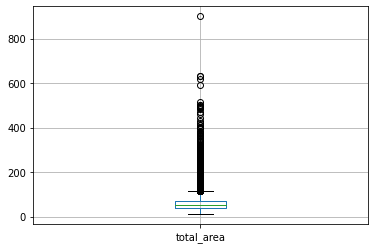

In [49]:
#построим диаграмму размаха для общей площади
real_estate_clear.boxplot('total_area');

In [50]:
#ограничим рассматриваемую площадь 120 кв.м. - сюда попадает основная масса квартир
real_estate_clear = real_estate_clear.query('total_area <= 120');

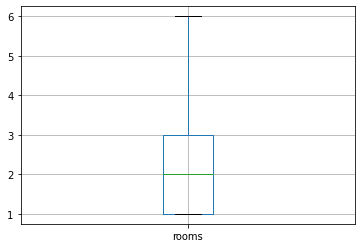

In [51]:
#теперь построим диаграмму размаха для количества комнат - тут всё ок
real_estate_clear.boxplot('rooms');

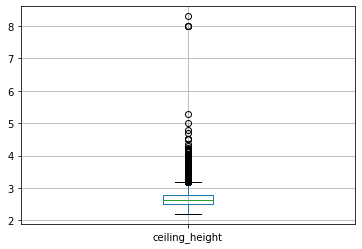

In [52]:
#высота потолков
real_estate_clear.boxplot('ceiling_height');

In [53]:
#уберём также сверхвысокие потолки, сделав отсечку на 3,5 м.
#даже если потолки 5-6-8 м - не ошибка (кто его знает, этот Санкт-Петербург), такая труба над головой - 
#скорее недостаток, влияющий на цену. Бальные залы мы уже отсекли по площади, а в обычной квартире - 
#это сложность прогрева, освещения и неприятное эхо круглый год

real_estate_clear = real_estate_clear.query('ceiling_height <= 3.5 or ceiling_height != ceiling_height')

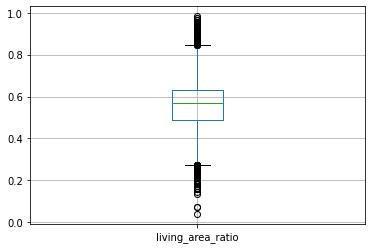

In [54]:
#уберём нестандартные планировки, в которых отношение жилой площади и отношение кухни к общей площади сильно выбивается
real_estate_clear.boxplot('living_area_ratio');

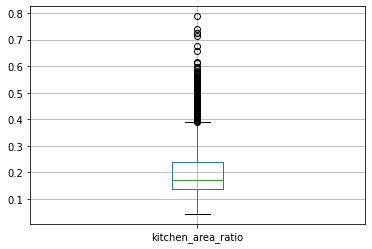

In [55]:
real_estate_clear.boxplot('kitchen_area_ratio');

In [56]:
real_estate_clear = real_estate_clear.query('living_area_ratio >= 0.3 and living_area_ratio <= 0.85')
real_estate_clear = real_estate_clear.query('kitchen_area_ratio <= 0.4')

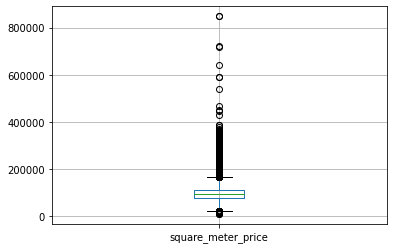

In [57]:
#исследовать мы будем стоимость квадратного метра, построим для него диаграмму рассеяния 
#и уберем все цены ниже 25000 и выше 170000 за кв.м.
real_estate_clear.boxplot('square_meter_price')
real_estate_clear = real_estate_clear.query('square_meter_price <= 170000 and square_meter_price >= 25000');

In [58]:
#в результате преобразований мы отсекли около 10% датафрейма
real_estate_clear.reset_index(drop=True, inplace=True)
real_estate_clear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20838 entries, 0 to 20837
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20838 non-null  int64         
 1   last_price            20838 non-null  int64         
 2   total_area            20838 non-null  float64       
 3   first_day_exposition  20838 non-null  datetime64[ns]
 4   rooms                 20838 non-null  int64         
 5   ceiling_height        12734 non-null  float64       
 6   floors_total          20838 non-null  int64         
 7   living_area           20838 non-null  float64       
 8   floor                 20838 non-null  int64         
 9   is_apartment          20838 non-null  bool          
 10  studio                20838 non-null  bool          
 11  open_plan             20838 non-null  bool          
 12  kitchen_area          20838 non-null  float64       
 13  balcony         

**Влияние собственных параметров квартиры и её расположения на цену**</br>
Изучим, как влияют на цену квадратного метра:</br>
- общая площадь квартиры</br>
- отношение жилой части к общей площади</br>
- отношение площади кухни к общей площади</br>
- высота потолков</br>
- количество комнат</br>
- этаж, на котором расположена квартира</br>
- расстрояние до центра</br>
- расстояние до аэропорта</br>
- количество парков и прудов в ближайшей доступности</br>
- расстояние до ближайших парков и прудов</br>
- дата публикации объявления

In [59]:
data_for_research = real_estate_clear[['total_area', 'living_area', 'living_area_ratio', 'kitchen_area', 'kitchen_area_ratio', 'ceiling_height', 'square_meter_price']]

total_area  living_area  living_area_ratio  kitchen_area  \
total_area            1.000000     0.927175           0.289962      0.525299   
living_area           0.927175     1.000000           0.607219      0.268213   
living_area_ratio     0.289962     0.607219           1.000000     -0.391320   
kitchen_area          0.525299     0.268213          -0.391320      1.000000   
kitchen_area_ratio   -0.455466    -0.644513          -0.749927      0.467205   
ceiling_height        0.388193     0.305699          -0.073590      0.383369   
square_meter_price    0.050127    -0.044297          -0.232660      0.273626   

                    kitchen_area_ratio  ceiling_height  square_meter_price  
total_area                   -0.455466        0.388193            0.050127  
living_area                  -0.644513        0.305699           -0.044297  
living_area_ratio            -0.749927       -0.073590           -0.232660  
kitchen_area                  0.467205        0.383369            0.273626  
kitchen_area_ratio            1.000000        0.060599            0.258744  
ceiling_height                0.060599        1.000000            0.293766  
square_meter_price            0.258744        0.293766            1.000000

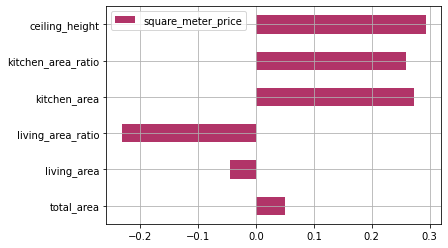

In [60]:
#найдем корреляцию с общей площадью, жилой площадью, размером кухни и высотой потолков и построим диаграмму корреляций
corr_coef = data_for_research.corr()
display(corr_coef)

cmap = cm.get_cmap('Spectral')
corr_coef.iloc[:6, :].plot(y='square_meter_price', kind='barh', grid=True, alpha=0.8, colormap=cmap);

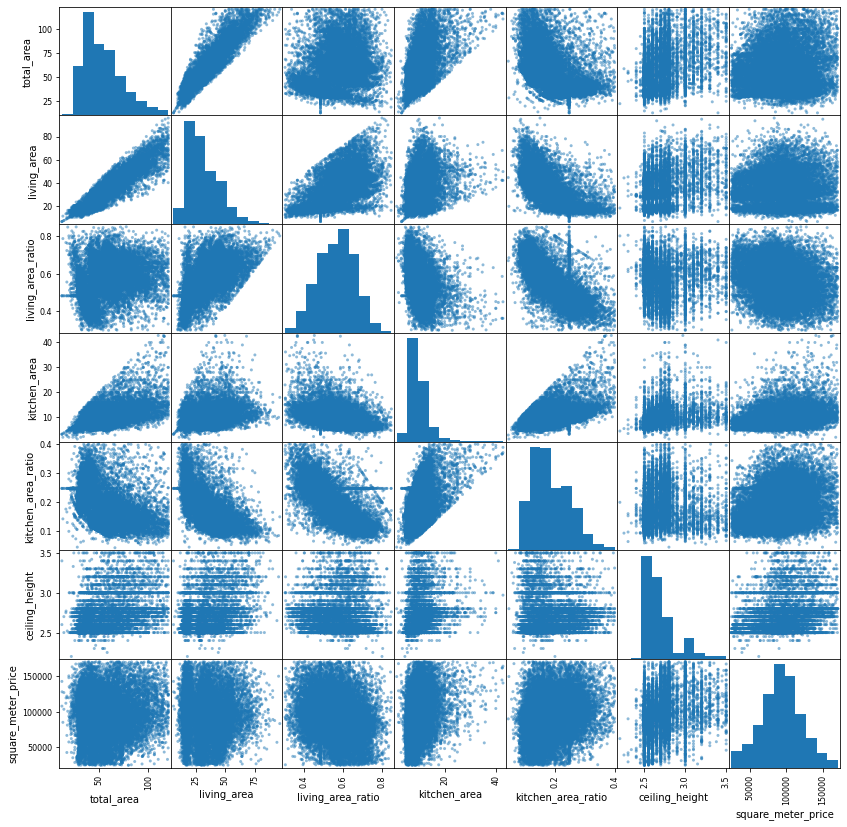

In [61]:
#изучим матрицу диаграмм рассеяния
pd.plotting.scatter_matrix(data_for_research, figsize=(14, 14));

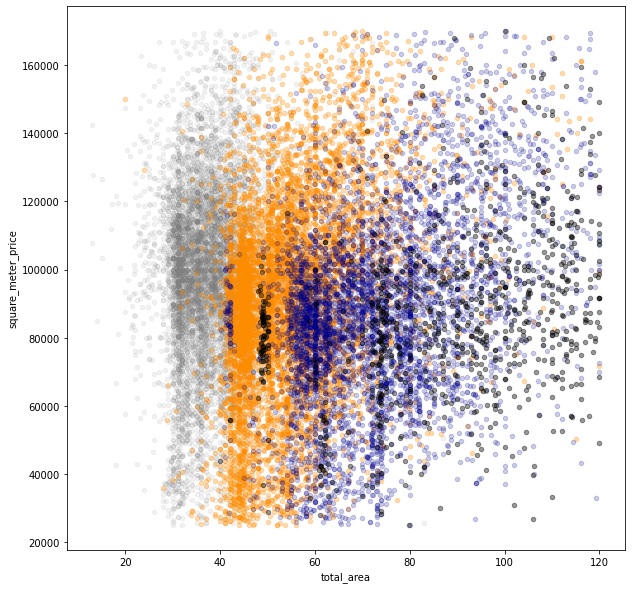

In [62]:
#разобьем зависимость цены квадратного метра от размера квартиры на 4 группы по числу комнат - 1, 2, 3, 4 и более комнат

ax = real_estate_clear.query('rooms == 1').plot.scatter(x='total_area', y='square_meter_price', alpha=0.1, color='Gray', figsize=(10, 10), legend=True);
real_estate_clear.query('rooms == 2').plot(x='total_area', y='square_meter_price', kind='scatter', alpha=0.3, ax=ax,  color='DarkOrange');
real_estate_clear.query('rooms == 3').plot(x='total_area', y='square_meter_price', kind='scatter', alpha=0.2, ax=ax, color='DarkBlue');
real_estate_clear.query('rooms > 3').plot(x='total_area', y='square_meter_price', kind='scatter', alpha=0.4, ax=ax, color='Black');

</br>
Если для однушек зависимость не особо прослеживается, что для 2+ комнат можно предположить, что c ростом общей площади комнаты становятся более просторными, что и вызывает положительную корреляцию.</br>
Посчитаем коэффициенты корреляции и убедимся, что зависимость цены от площади в отдельных группах всё-таки есть - несмотря на то, что по усредненному датасету она не прослеживается.</br>

In [63]:
print('Одна комната:', real_estate_clear.query('rooms == 1')['total_area'].corr(real_estate_clear['square_meter_price']))
print('Две комнаты:', real_estate_clear.query('rooms == 2')['total_area'].corr(real_estate_clear['square_meter_price']))
print('Три комнаты:', real_estate_clear.query('rooms == 3')['total_area'].corr(real_estate_clear['square_meter_price']))
print('Четыре и больше комнат:', real_estate_clear.query('rooms >= 4')['total_area'].corr(real_estate_clear['square_meter_price']))

Одна комната: 0.10430243916630318
Две комнаты: 0.34464730270821897
Три комнаты: 0.3658006817656435
Четыре и больше комнат: 0.33834753370236387


**Промежуточные выводы**</br>
как видно из коэффициентов корреляции и матрицы рассеяния, однозначного влияния параметров квартир на их стоимость нет - скорее, можно выделить некоторые тренды:
- стоимость квадратного метра жилья фактически не зависит от общей площади квартиры и площади жилой зоны. При разбиении на группы по числу комнат корреляция между стоимостью квадрата и площадью объекта сильнее всего для 2-3 конатных квартир
- есть тренд на снижение стоимости жилья в зависимости от увеличения жилой площади в нём: вероятно свой вклад в корреляцию вносят планировки, с большими комнатами, крошечным санузлом и тесной кухней
- в отношении кухни тренд наоборот положительный - чем больше кухня, тем больше выигрывает квартира
- самая сильная корреляция с ценой у высоты потолков: это можно объяснить как любовью покупателя к пространству над головой, так и тем, что высокие потолки чаще имеют исторические здания, расположенные ближе к центру и имеющие более высокую цену</br>
</br>

In [64]:
data_for_research_pure_price = real_estate_clear[['total_area', 'living_area', 'living_area_ratio', 'kitchen_area', 'kitchen_area_ratio', 'ceiling_height', 'last_price']]

total_area  living_area  living_area_ratio  kitchen_area  \
total_area            1.000000     0.927175           0.289962      0.525299   
living_area           0.927175     1.000000           0.607219      0.268213   
living_area_ratio     0.289962     0.607219           1.000000     -0.391320   
kitchen_area          0.525299     0.268213          -0.391320      1.000000   
kitchen_area_ratio   -0.455466    -0.644513          -0.749927      0.467205   
ceiling_height        0.388193     0.305699          -0.073590      0.383369   
last_price            0.771038     0.654978           0.071403      0.570634   

                    kitchen_area_ratio  ceiling_height  last_price  
total_area                   -0.455466        0.388193    0.771038  
living_area                  -0.644513        0.305699    0.654978  
living_area_ratio            -0.749927       -0.073590    0.071403  
kitchen_area                  0.467205        0.383369    0.570634  
kitchen_area_ratio            1.000000        0.060599   -0.177173  
ceiling_height                0.060599        1.000000    0.469402  
last_price                   -0.177173        0.469402    1.000000

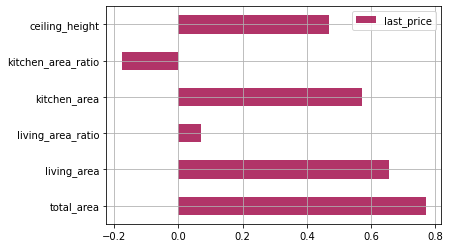

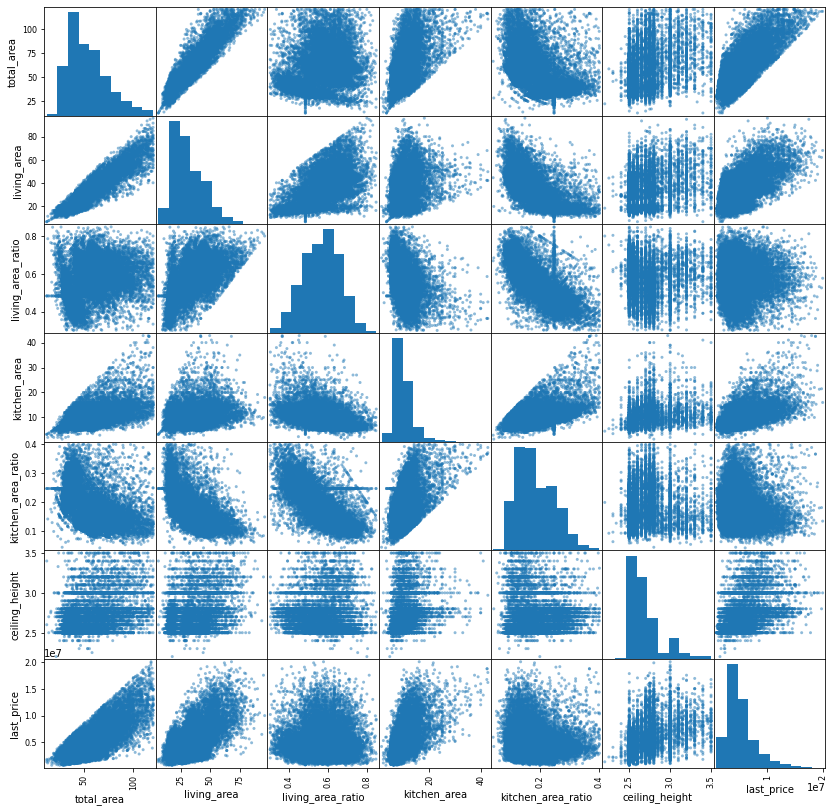

In [65]:
corr_coef_pure_price = data_for_research_pure_price.corr()
display(corr_coef_pure_price)

corr_coef_pure_price.iloc[:6, :].plot(y='last_price', kind='barh', grid=True, alpha=0.8, colormap=cmap);

pd.plotting.scatter_matrix(data_for_research_pure_price, figsize=(14, 14));

**Промежуточные выводы 2**</br>
степень корреляций "чистой цены" с параметрами квартиры намного больше, что, в общем-то логично:</br>
- чем больше площадь квартиры, тем выше цена - это совершенно понятно. Но: коэффициент корреляции - 0.77, что показывает, что не только площадь влияет на цену - иначе корреляция была бы близка к единице
- чем больше жилая площадь и площадь кухни - тем больше цена. Здесь коэффициенты корреляции еще ниже - влияние этих двух факторов на стоимость довольно сильно перебивается другими параметрами. Или, например, это может говорить о разнообразии планировок - например, в городе много больших квартир с маленькими кухнями/комнатами или маленьких - с большими, поэтому взаимосвязь конечной цены с этими факторами ниже, чем у конечной цены и общей площадью
- выше коэффициент корреляции между конечной ценой и высотой потолков - скорее всего потому, что и цены, и потолкии выше в центре города
- коэффициенты корреляции для соотношения жилой зоны и кухни к общей площади сменили знак, но при этом стали еще меньше - видимо, планировка фактически не влияет на конечную цену квартиры

In [66]:
#в графиках матрицы рассеяния выше видны четкие линии на графиках, связанных с жилой площадью и площадью кухни - 
#это отображаются результаты восстановления пропусков. Посмотрим, вдруг восстановление пропусков способно исказить картину?
#для этого возьем копию, сделанную до восстановления этих пропусков, добавим расчётные столбцы, уберем выбросы и аномалии

real_estate_raw = real_estate_copy.copy(deep=True)
real_estate_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

In [67]:
#добавление столбцов

real_estate_raw['living_area_ratio'] = real_estate_raw['living_area']/real_estate_raw['total_area']
real_estate_raw['kitchen_area_ratio'] = real_estate_raw['kitchen_area']/real_estate_raw['total_area']
real_estate_raw['square_meter_price'] = real_estate_raw['last_price']/real_estate_raw['total_area']
real_estate_raw['day_of_week'] = real_estate_raw['first_day_exposition'].dt.day_name()
real_estate_raw['month'] = real_estate_raw['first_day_exposition'].dt.month
real_estate_raw['year'] = real_estate_raw['first_day_exposition'].dt.year

def floor_category(floor, floors_total):
    #floor, floors_total = floor_info
    #print(floor_info[0])
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

real_estate_raw['floor_category'] = real_estate_raw.apply(lambda x: floor_category(x.floor, x.floors_total), axis=1)

In [68]:
#очистка от аномалий и выбросов

real_estate_raw = real_estate_raw.query('studio == False and is_apartment == False and open_plan == False')
real_estate_raw = real_estate_raw.query('ceiling_height >= 2.2 and ceiling_height < 10 or ceiling_height != ceiling_height')
real_estate_raw = real_estate_raw.query('last_price !=12190')
real_estate_raw = real_estate_raw.query('total_area <= 120')
real_estate_raw = real_estate_raw.query('ceiling_height <= 3.5 or ceiling_height != ceiling_height')
real_estate_raw = real_estate_raw.query('living_area_ratio >= 0.3 and living_area_ratio <= 0.85 or living_area_ratio != living_area_ratio')
real_estate_raw = real_estate_raw.query('kitchen_area_ratio <= 0.4 or kitchen_area_ratio != kitchen_area_ratio')
real_estate_raw = real_estate_raw.query('square_meter_price <= 170000 and square_meter_price >= 25000')

#после всех преобразований скорректируем индексы
real_estate_raw.reset_index(drop=True, inplace=True)

In [69]:
#посчитаем корреляции и сравним - видно, что коэффициенты корреляции если и поменялись, то незначительно

data_for_research_raw = real_estate_raw[['total_area', 'living_area', 'living_area_ratio', 'kitchen_area', 'kitchen_area_ratio', 'ceiling_height', 'square_meter_price']]
corr_coef_raw = data_for_research_raw.corr()
display(corr_coef, corr_coef_raw)

total_area  living_area  living_area_ratio  kitchen_area  \
total_area            1.000000     0.927175           0.289962      0.525299   
living_area           0.927175     1.000000           0.607219      0.268213   
living_area_ratio     0.289962     0.607219           1.000000     -0.391320   
kitchen_area          0.525299     0.268213          -0.391320      1.000000   
kitchen_area_ratio   -0.455466    -0.644513          -0.749927      0.467205   
ceiling_height        0.388193     0.305699          -0.073590      0.383369   
square_meter_price    0.050127    -0.044297          -0.232660      0.273626   

                    kitchen_area_ratio  ceiling_height  square_meter_price  
total_area                   -0.455466        0.388193            0.050127  
living_area                  -0.644513        0.305699           -0.044297  
living_area_ratio            -0.749927       -0.073590           -0.232660  
kitchen_area                  0.467205        0.383369            0.273626  
kitchen_area_ratio            1.000000        0.060599            0.258744  
ceiling_height                0.060599        1.000000            0.293766  
square_meter_price            0.258744        0.293766            1.000000

total_area  living_area  living_area_ratio  kitchen_area  \
total_area            1.000000     0.921873           0.266712      0.522132   
living_area           0.921873     1.000000           0.598704      0.251681   
living_area_ratio     0.266712     0.598704           1.000000     -0.409775   
kitchen_area          0.522132     0.251681          -0.409775      1.000000   
kitchen_area_ratio   -0.431643    -0.636767          -0.765336      0.493852   
ceiling_height        0.388193     0.311344          -0.075633      0.388545   
square_meter_price    0.050127    -0.053673          -0.238922      0.277898   

                    kitchen_area_ratio  ceiling_height  square_meter_price  
total_area                   -0.431643        0.388193            0.050127  
living_area                  -0.636767        0.311344           -0.053673  
living_area_ratio            -0.765336       -0.075633           -0.238922  
kitchen_area                  0.493852        0.388545            0.277898  
kitchen_area_ratio            1.000000        0.064993            0.265138  
ceiling_height                0.064993        1.000000            0.293766  
square_meter_price            0.265138        0.293766            1.000000

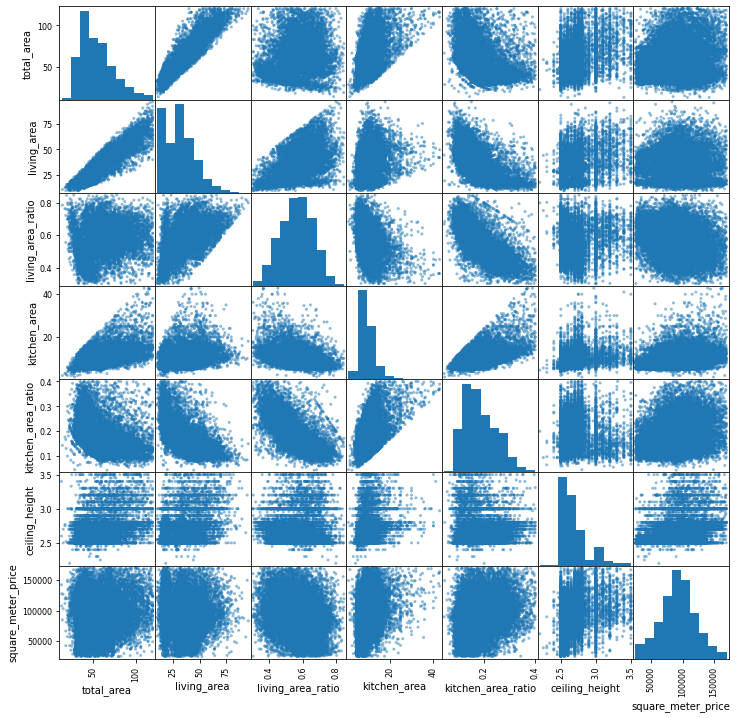

In [70]:
#еще раз посмотрим на матрицы рассеяния

pd.plotting.scatter_matrix(data_for_research_raw, figsize=(12, 12));

Характерных полос на матрицах рассеяния теперь нет. Однако на зависимостях Living_area_ratio vs kitchen_area_ratio всё еще видны упорядоченные линии - это может говорить о том, что в некоторых строках базы использовались не реальные данные, а расчётные.

**Теперь посмотрим, как на стоимость влияет количество комнат, этаж, наличие парков и водоёмов рядом, а также расстояние до центра и ближайшего аэропорта** </br>

square_meter_price  count
rooms                           
1           100000.000000   7487
2            91935.483871   7322
3            87228.164996   5140
4            85084.574370    796
5            82524.271845     85
6            89352.272727      8

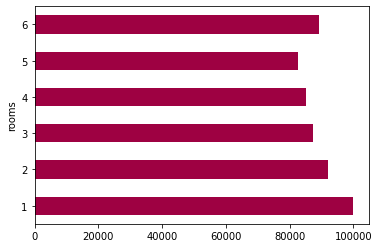

In [71]:
#сгруппируем данные по числу комнат, посчитаем медиану по стоимости квадрата и количество в получившихся выборках

rooms_data = real_estate_raw.pivot_table(index='rooms', values='square_meter_price', aggfunc=['median', 'count'])
rooms_data.columns = ['square_meter_price', 'count']
display(rooms_data)
rooms_data['square_meter_price'].plot(kind='barh', colormap=cmap);

</br>
Получается, что чем больше комнат, тем ниже цена за квадрат - и самыми "дорогими" получаются однушки (случай с 6-ю комнатами, пожалуй, не в счёт - слишком маленькая выборка, чтобы делать однозначные выводы). </br>

square_meter_price
floor_category                    
другой                96666.666667
первый                81012.658228
последний             85950.226244

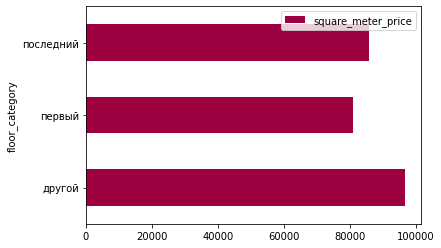

In [72]:
#смотрим зависимость цены от этажа

floor_data = real_estate_raw.pivot_table(index='floor_category', values='square_meter_price', aggfunc='median')
display(floor_data)
floor_data.plot(kind='barh', colormap=cmap);

</b>Здесь достаточно ожидаемо: первый этаж ценится менее всего, к последнему лояльности больше, но большинство покупателей предпочитает жить "посерединке".
</b>

Корреляция между стоимостью и расстоянием до парка: 0.06681484946199888


square_meter_price  count
parks_around3000                           
0.0                     98310.200254   9204
1.0                    101951.029433   4858
2.0                    102181.081081   1360
3.0                     99210.412013    432

0.06681484946199888


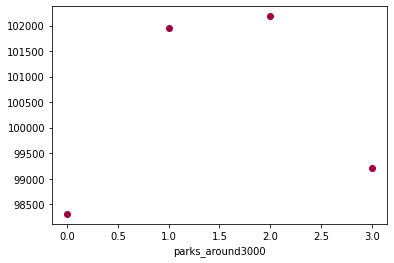

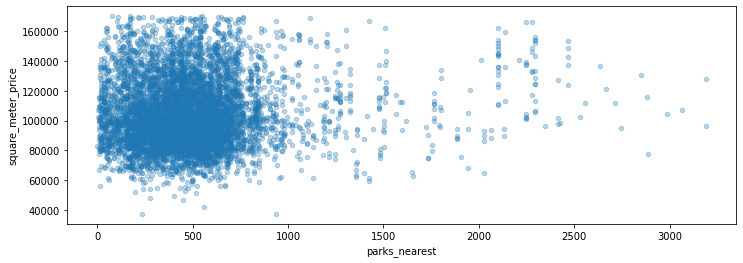

In [73]:
#как здорово, когда живешь возле парка. Посмотрим, насколько это ценят в Питере.

parks_data = real_estate_raw.pivot_table(index='parks_around3000', values='square_meter_price', aggfunc=['median', 'count'])
parks_data.columns = ['square_meter_price', 'count']
print('Корреляция между стоимостью и расстоянием до парка:', real_estate_raw['parks_nearest'].corr(real_estate_raw['square_meter_price']))
display(parks_data)
parks_data['square_meter_price'].plot(style='o', colormap=cmap);
real_estate_raw.plot(x='parks_nearest', y='square_meter_price', kind='scatter', alpha=0.3, figsize=(12, 4));

print(real_estate_raw['parks_nearest'].corr(real_estate_raw['square_meter_price']))

</br>Однозначно можно сказать только, что с парком - лучше, чем без него. При этом один или два парка - большой разницы нет. В случаях с тремя парками цена вообще падает - теоретически это можно объяснить тем, что по три парка сразу встречается скорее на окраинах или в пригороде, а такое жилье обычно дешевле и число парков тут не при чём. Корреляция расстояния до ближайшего парка и стоимости близка к нулю</br>

Корреляция между стоимостью и расстоянием до водоёма: -0.03865295442320472


square_meter_price  count
ponds_around3000                           
0.0                     98888.888889   8292
1.0                    100000.000000   4983
2.0                    101174.948240   1552
3.0                    106250.000000   1027

<AxesSubplot:xlabel='ponds_nearest', ylabel='square_meter_price'>

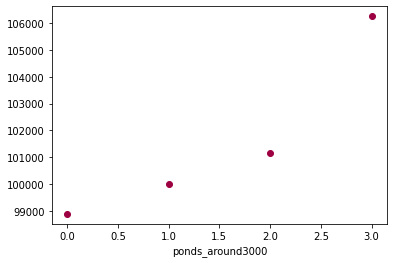

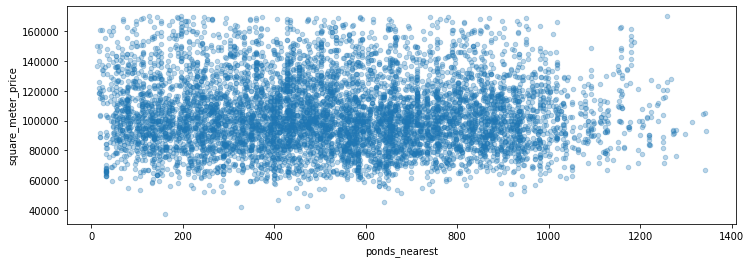

In [74]:
ponds_data = real_estate_raw.pivot_table(index='ponds_around3000', values='square_meter_price', aggfunc=['median', 'count'])
ponds_data.columns = ['square_meter_price', 'count']
print('Корреляция между стоимостью и расстоянием до водоёма:', real_estate_raw['ponds_nearest'].corr(real_estate_raw['square_meter_price']))
display(ponds_data)
ponds_data['square_meter_price'].plot(style='o', colormap=cmap);
real_estate_raw.plot(x='ponds_nearest', y='square_meter_price', kind='scatter', alpha=0.3, figsize=(12, 4))

</br>Чем больше водоёмов рядом - тем дороже квартира. В условиях Санкт-Петербурга можно предположить, что чем больше воды - тем ближе к центру. Но даже не в центре район с тремя водоёмами - это однозначно что-то хорошее. А вот корреляции между расстоянием до воды и стоимостью нет, как и в случае парков.</br>

ponds_around3000            0.0            1.0            2.0            3.0
parks_around3000                                                            
0.0                97777.777778   99672.596721   96604.519690  102489.908257
1.0               100858.511422  100465.345036  104717.806041  112437.500000
2.0               102234.771645  101258.001356  100000.000000  105660.040974
3.0                94692.923590  100502.512563  102246.485944   98630.136986

<AxesSubplot:xlabel='parks_around3000'>

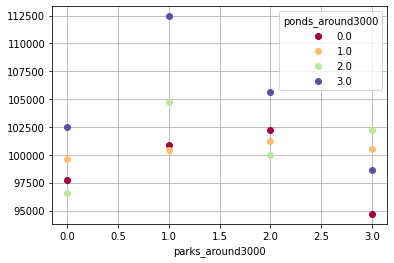

In [75]:
#соединим вместе пруды и парки

nature_data = real_estate_raw.groupby(['parks_around3000', 'ponds_around3000'])['square_meter_price'].agg('median').unstack()
display(nature_data)
nature_data.plot(style='o', grid=True, colormap=cmap)

Похоже, что в Санкт-Петербурге близость воды сильнее влияет на стоимость, чем близость парков и скверов, что обусловлено скорее георграфическими особенностями центральной части города - в более престижных районах в Питере больше воды, чем зелени

Корреляция между стоимостью и расстоянием до центра: -0.4024660805980079


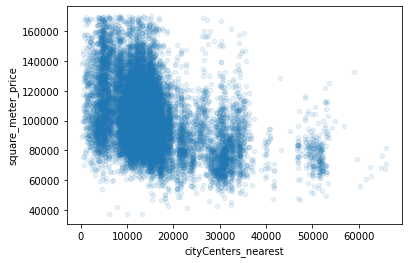

In [76]:
#изучим влияние расстояния до центра - она есть и вполне ожидаемая: чем дальше, тем недвижимость дешевле

real_estate_raw.plot(x='cityCenters_nearest', y='square_meter_price', kind='scatter', alpha=0.1)
print('Корреляция между стоимостью и расстоянием до центра:', real_estate_raw['cityCenters_nearest'].corr(real_estate_raw['square_meter_price']))

Корреляция между стоимостью и расстоянием до аэропорта: -0.030997152591550805


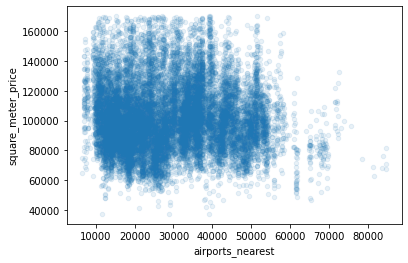

In [77]:
#посмотрим на расстояние до аэропорта - и, кажется, этот параметр ни на что не влияет

real_estate_raw.plot(x='airports_nearest', y='square_meter_price', kind='scatter', alpha=0.1)
print('Корреляция между стоимостью и расстоянием до аэропорта:', real_estate_raw['airports_nearest'].corr(real_estate_raw['square_meter_price']))

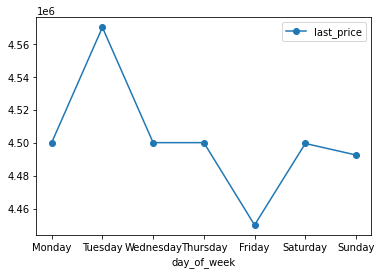

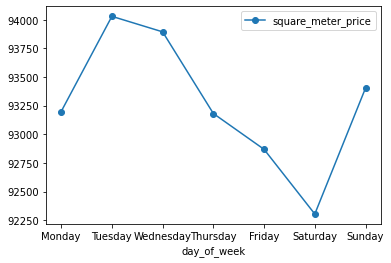

In [78]:
#изучим время размещения объявлений и посмотрим, насколько сильно оно влияет на цену в целом и цену за квадратный метр.
#сначала посмотрим размещение по дням недели

#exposition_time = real_estate_raw.groupby(['year', 'month', 'day_of_week'])['square_meter_price'].agg('median').unstack()
#exposition_time.plot()

exposition_time_day_of_week = real_estate_raw.groupby('day_of_week')[['square_meter_price', 'last_price']].agg('median').reset_index()
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
exposition_time_day_of_week['day_of_week'] = pd.Categorical(exposition_time_day_of_week['day_of_week'], categories=cats, ordered=True)
exposition_time_day_of_week = exposition_time_day_of_week.sort_values('day_of_week')
exposition_time_day_of_week.plot(x='day_of_week', y='last_price', style='o-');
exposition_time_day_of_week.plot(x='day_of_week', y='square_meter_price', style='o-');

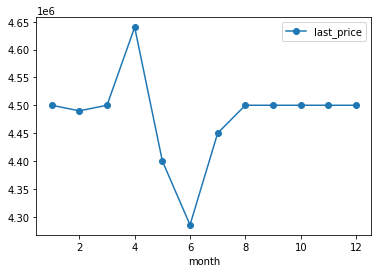

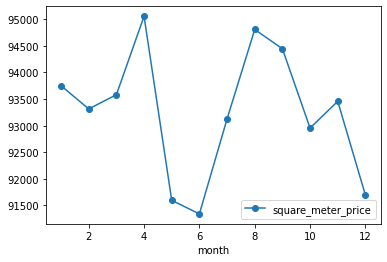

In [79]:
#и зависимость цен от месяца
exposition_time_month = real_estate_raw.groupby('month')[['square_meter_price', 'last_price']].agg('median')
exposition_time_month.plot(y='last_price', style='o-');
exposition_time_month.plot(y='square_meter_price', style='o-');


Что касается дней недели - квартиры с самыми высокими ценами размещены во вторник. Затем цена снижается до минимума в пятницу и возвращается на прежний уровень в субботу. ЗАвисимость стоимости квадратного от дня недели более гладкая, максимум так же приходится на вторник, а вот  минимум - на субботу. </br>
График цены показывает, что самым "невыгодным" является июнь (видимо, и спрос в этом месяце самый низкий), а самым выгодным - апрель. Заметную же часть года цены более-менее стабильны. С точки зрения стоимость квадратного метра, апрель так же самый маржинальный месяц, а июнь - самый невыгодный. Цена квадрата выше в августе и сентябре, а ближе к новому году проседает, повышаясь лишь в январе. Возможно, что такое поведение стоимости квадрата - это влияние новостроек и сезонности их продаж.

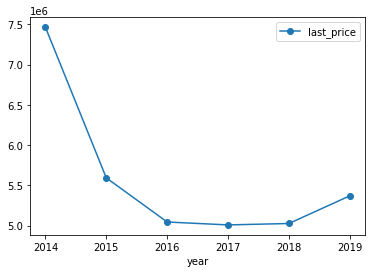

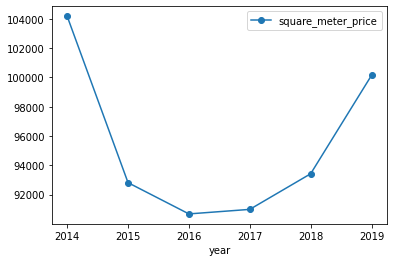

In [80]:
#посмотрим на год размещения влияет - и с годами цены растут. Пик стоимости в 2014м требует дополнительного изучения: 
#в нем "закопаны" всего два месяца - ноябрь и декабрь и сделать однозначный вывод о падении стоимости 
#недвижимости в 2015м году нельзя. В 2016м цены слегка просели относительно 2015го, а затем 
#пошли в рост почти по экспоненте (но наличие или отсутствие экспоненциальной зависимости требует дополнительной проверки)

exposition_time_year = real_estate_raw.groupby('year')[['square_meter_price', 'last_price']].agg('mean')
exposition_time_year.plot(y='last_price', style='o-');
exposition_time_year.plot(y='square_meter_price', style='o-');

Первый вывод, который напрашивается - в 2015 цены на недвижимость в Питере рухнули. Однако, это утверждение требует дополнительного изучения: в 2014м "закопаны" всего два месяца - ноябрь и декабрь и сравнивать их с целым 2015м годом не очень корректно. </br>
</br>
На обоих графиках видно, что цены просели год на год в 2016м году, потом начали понемногу расти, показав заметный рост в 2019м. При этом рост квадратного метра в среднем оказался сильнее, чем рост цен в среднем: это можно объяснить (как один из вариантов) тем, что с оживлением рынка в 2017м активизировалось и строительство: и в 2018/2019 на рынок вышли новостройки с малогабаритными квартирами - цена вроде в среднем рыночная, а стоимость квадрата в ней выше. </br>

Корреляция между стоимостью квадрата и количеством балконов: 0.036815855947949026
Корреляция между стоимостью квартиры и количеством балконов: 0.06935968962854897


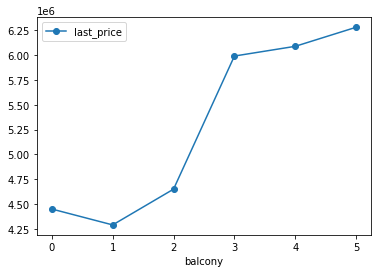

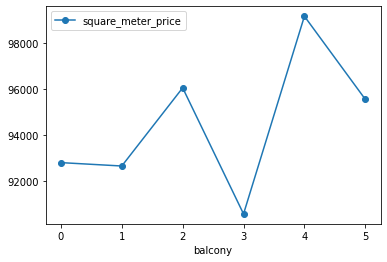

In [81]:
#напоследок изучим зависимость стоимость квадрата от количества балконов - коэффициент близок к нулю, да и график говорит 
#скорее об отсутствии зависимости, чем о её наличии
#видно, что квартиры с 3-4-5 балконами более характерны для дорогих квартир

real_estate_balcony = real_estate_raw.groupby('balcony')[['square_meter_price', 'last_price']].agg('median')
real_estate_balcony.plot(y='last_price', style='o-');
real_estate_balcony.plot(y='square_meter_price', style='o-');

print('Корреляция между стоимостью квадрата и количеством балконов:', real_estate_raw['balcony'].corr(real_estate_raw['square_meter_price']))
print('Корреляция между стоимостью квартиры и количеством балконов:', real_estate_raw['balcony'].corr(real_estate_raw['last_price']))

### Недвижимость в Ленинградской области

Посмотрим, как меняется цена в наиболее крупных (с точки зрения предложения) населённых пунктах Ленинградской области.</br>
Отберём 10 точек с наибольшим количеством предложений, усредним стоимость квартир и отсортируем по возрастанию. </br>
Самым выгодным с точки зрения приобретения недвижимости (после, конечно, Санкт-Петербурга) является Пушкин. А самые низкие цены относительно Питера - в Выборге.</br>

square_meter_price
locality_name                        
выборг                   58590.915004
всеволожск               66935.692146
гатчина                  69178.296609
колпино                  75347.064911
посёлок шушары           77965.585805
посёлок мурино           85301.634802
посёлок парголово        90125.184057
деревня кудрово          95067.963245
пушкин                  101848.889877
санкт-петербург         105639.252957

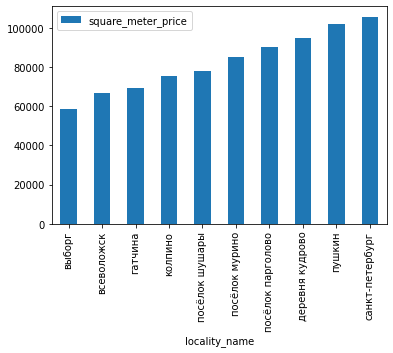

In [82]:
best_localities = real_estate_raw['locality_name'].value_counts()[:10].index
real_estate_best_localities = (
    real_estate_raw.query('locality_name in @best_localities')
    .pivot_table(index='locality_name', values='square_meter_price')
    .sort_values(by='square_meter_price')
    .plot(kind='bar')
)

display(real_estate_raw.query('locality_name in @best_localities')
    .pivot_table(index='locality_name', values='square_meter_price')
    .sort_values(by='square_meter_price'))

### Исследование стоимости недвижимости в центре Санкт-Петербурга

Отберём все предложения в Санкт-Петербурге и разделим расстояние до центра на стоимость квартиры - так мы получим среднюю стоимость километра.</br>

In [83]:
real_estate_spb = real_estate_copy.loc[(real_estate_copy['locality_name'] == 'санкт-петербург') & 
                         (real_estate_copy['cityCenters_nearest'] >= 0)].reset_index(drop=True)

In [84]:
real_estate_spb['center_distance'] = (real_estate_spb['cityCenters_nearest']/1000).astype('int64')

In [85]:
real_estate_spb['price_per_km'] = real_estate_spb['last_price']/real_estate_spb['center_distance'];

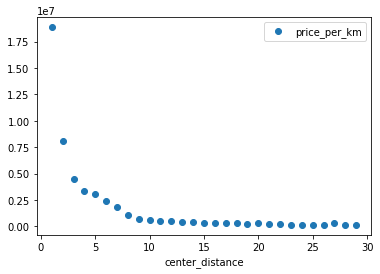

In [86]:
real_estate_spb.pivot_table(index='center_distance', values='price_per_km').plot(style='o');

<AxesSubplot:xlabel='center_distance'>

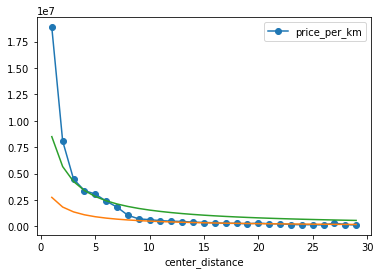

In [87]:
ax = real_estate_spb.pivot_table(index='center_distance', values='price_per_km').plot(style='-o')
### КОД РЕВЬЮЕРА ###
(pd.Series([5.5e6]*30)[1:] / pd.Series(range(1,31))[1:]).plot(ax=ax)
(pd.Series([1.7e7]*30)[1:] / pd.Series(range(1,31))[1:]).plot(ax=ax)

                 price_per_km
center_distance              
29                        NaN
26               5.316092e+03
24               2.342646e+04
25               1.020115e+03
28               1.342843e+04
23               4.053986e+03
19               6.682131e+04
22               3.639435e+02
21               2.066745e+02
17               3.979016e+04
18               1.055739e+04
27               1.023894e+04
20               1.088580e+04
16               2.704999e+04
15               2.423166e+04
14               4.171348e+04
13               5.164336e+04
12               3.503864e+04
11               4.411451e+04
10               9.508089e+04
9                7.723638e+04
8                3.394486e+05
7                7.743884e+05
6                5.699453e+05
5                6.628722e+05
4                3.354664e+05
3                1.087754e+06
2                3.597380e+06
1                1.076919e+07
0                         inf


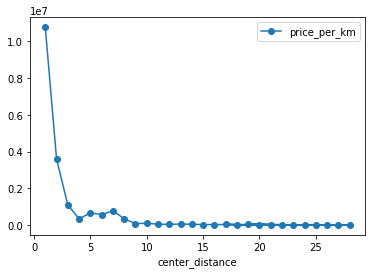

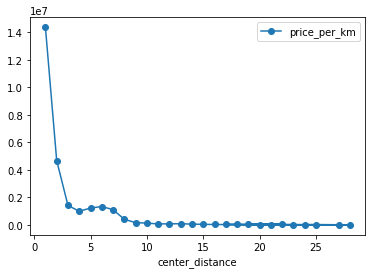

In [88]:
print(real_estate_spb.pivot_table(index='center_distance', values='price_per_km').sort_values(by='price_per_km').diff(1))
real_estate_spb.pivot_table(index='center_distance', values='price_per_km').sort_values(by='price_per_km').diff(1).plot(style='-o');
real_estate_spb.pivot_table(index='center_distance', values='price_per_km').sort_values(by='price_per_km').diff(2).plot(style='-o');

In [90]:
#видно, что стоимость резко меняется на последних двух километрах - это и будет "центр"
#сделаем выборку по всем объектам, удалённым от центральной точки не более, чем на 2 км, посмотрим длину датафрейма

real_estate_piter_center = real_estate_spb.query('center_distance <= 3').reset_index(drop=True)
print(len(real_estate_piter_center))

1157


In [91]:
#добавим в него отношение жилой площади и размера кухни к общей площади, цену кв.метра, день недели, месяц и год публикации
#выведем на экран первые 5 строк

real_estate_piter_center['living_area_ratio'] = real_estate_piter_center['living_area']/real_estate_piter_center['total_area']
real_estate_piter_center['kitchen_area_ratio'] = real_estate_piter_center['kitchen_area']/real_estate_piter_center['total_area']

real_estate_piter_center['square_meter_price'] = (real_estate_piter_center['last_price']/real_estate_piter_center['total_area']).astype('int64')
real_estate_piter_center['day_of_week'] = real_estate_piter_center['first_day_exposition'].dt.day_name()

real_estate_piter_center['month'] = real_estate_piter_center['first_day_exposition'].dt.month
real_estate_piter_center['year'] = real_estate_piter_center['first_day_exposition'].dt.year

def floor_category(floor, floors_total):
    #floor, floors_total = floor_info
    #print(floor_info[0])
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

real_estate_piter_center['floor_category'] = real_estate_piter_center.apply(lambda x: floor_category(x.floor, x.floors_total), axis=1)

real_estate_piter_center.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0             8     6500000        97.2           2015-10-31      2   
1             6    15500000       149.0           2017-06-26      5   
2            32     9600000        90.0           2017-09-26      4   
3            16     6500000        51.8           2018-08-01      2   
4             8     4800000        40.0           2017-11-18      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0             NaN             3         46.5      1         False  ...   
1             NaN             5        104.0      4         False  ...   
2             NaN             5         67.0      2         False  ...   
3            3.45             6         25.6      2         False  ...   
4             NaN             3         29.0      2         False  ...   

   days_exposition  center_distance  price_per_km  living_area_ratio  \
0            265.0                2  3.250000e+06           0.478395   
1            644.0                3  5.166667e+06           0.697987   
2            104.0                2  4.800000e+06           0.744444   
3            163.0                3  2.166667e+06           0.494208   
4             80.0                2  2.400000e+06           0.725000   

  kitchen_area_ratio  square_meter_price  day_of_week  month  year  \
0           0.201646               66872     Saturday     10  2015   
1           0.114094              104026       Monday      6  2017   
2           0.088889              106666      Tuesday      9  2017   
3           0.140927              125482    Wednesday      8  2018   
4           0.150000              120000     Saturday     11  2017   

   floor_category  
0          первый  
1          другой  
2          другой  
3          другой  
4          другой  

[5 rows x 31 columns]

In [92]:
#получим статистики для общей площади, числа комнат, высоты потолков

real_estate_piter_center.loc[:, ['total_area', 'rooms', 'ceiling_height']].describe().round(2)

total_area    rooms  ceiling_height
count     1157.00  1157.00          795.00
mean        97.39     3.10            3.26
std         55.79     1.56            1.38
min         12.00     0.00            2.45
25%         62.00     2.00            3.00
50%         84.10     3.00            3.17
75%        115.20     4.00            3.40
max        517.00    19.00           32.00

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

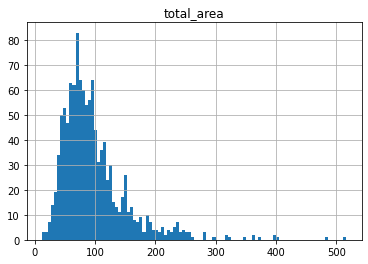

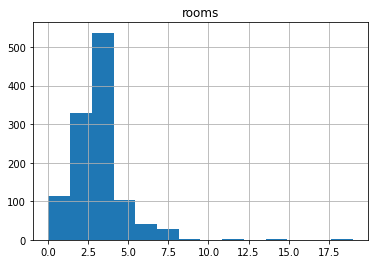

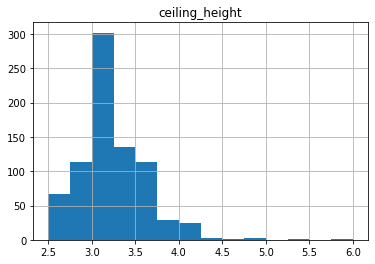

In [93]:
#построим гистограммы для этих величин

real_estate_piter_center.hist('total_area', bins=100)
real_estate_piter_center.hist('rooms', bins=14)
real_estate_piter_center.hist('ceiling_height', bins=14, range=(2.5, 6))

</br>
Видно, что в центре реже продают маленькие квартиры, чем в целом в городе (скорее всего потому, что маленьких квартир в центре почти нет. Чаще всего это помещения площадью 65-120 кв.м. (медиана - на 84 кв.м.), имеющие 2, 3 или 4 комнаты. Причём на 2-3 комнатные квартиры приходится основной объем, а "трёшек" в 2 с лишним раза больше, чем "однушек". Есть несколько студий. Большинство потолков - более трёх метров, доходит почти до 6 - значит речь идёт преимущественно о квартирах в исторических зданиях (значение потолка 32м скорее всего опечатка, за которой прячется 3.2 м).</br>

In [94]:
#выведем статистику для стоимости и гистограмму

display(real_estate_piter_center['last_price'].describe().apply("{0:.0f}".format))
real_estate_piter_center['square_meter_price'].describe().apply("{0:.0f}".format)

count         1157
mean      16034281
std       32948225
min        2100000
25%        7000000
50%        9500000
75%       14490000
max      763000000
Name: last_price, dtype: object

count       1157
mean      146060
std       125011
min        28919
25%        95000
50%       116150
75%       150000
max      1907500
Name: square_meter_price, dtype: object

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

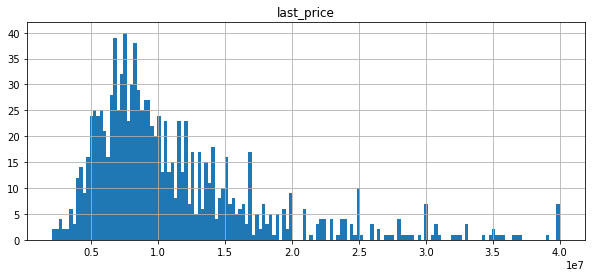

In [95]:
real_estate_piter_center.query('last_price <= 40000000').hist('last_price', bins=150, figsize=(10, 4))

</br>Ожидаемо, стоимость в центре выше, чем по городу и области - медиана стоимости квадратного метра приходится на 121 тыс. против 105 по Санкт-Петербургу и 95 тыс. по области.
</br>

total_area  living_area  living_area_ratio  kitchen_area  \
total_area            1.000000     0.960647           0.177732      0.518567   
living_area           0.960647     1.000000           0.409899      0.390620   
living_area_ratio     0.177732     0.409899           1.000000     -0.310641   
kitchen_area          0.518567     0.390620          -0.310641      1.000000   
kitchen_area_ratio   -0.311684    -0.429033          -0.627952      0.544051   
ceiling_height        0.026559     0.031123          -0.005044      0.034220   
square_meter_price    0.259617     0.214719          -0.076170      0.268260   
last_price            0.532267     0.463689          -0.005690      0.388214   

                    kitchen_area_ratio  ceiling_height  square_meter_price  \
total_area                   -0.311684        0.026559            0.259617   
living_area                  -0.429033        0.031123            0.214719   
living_area_ratio            -0.627952       -0.005044           -0.076170   
kitchen_area                  0.544051        0.034220            0.268260   
kitchen_area_ratio            1.000000        0.020195            0.063419   
ceiling_height                0.020195        1.000000            0.032449   
square_meter_price            0.063419        0.032449            1.000000   
last_price                   -0.082678        0.030646            0.835491   

                    last_price  
total_area            0.532267  
living_area           0.463689  
living_area_ratio    -0.005690  
kitchen_area          0.388214  
kitchen_area_ratio   -0.082678  
ceiling_height        0.030646  
square_meter_price    0.835491  
last_price            1.000000

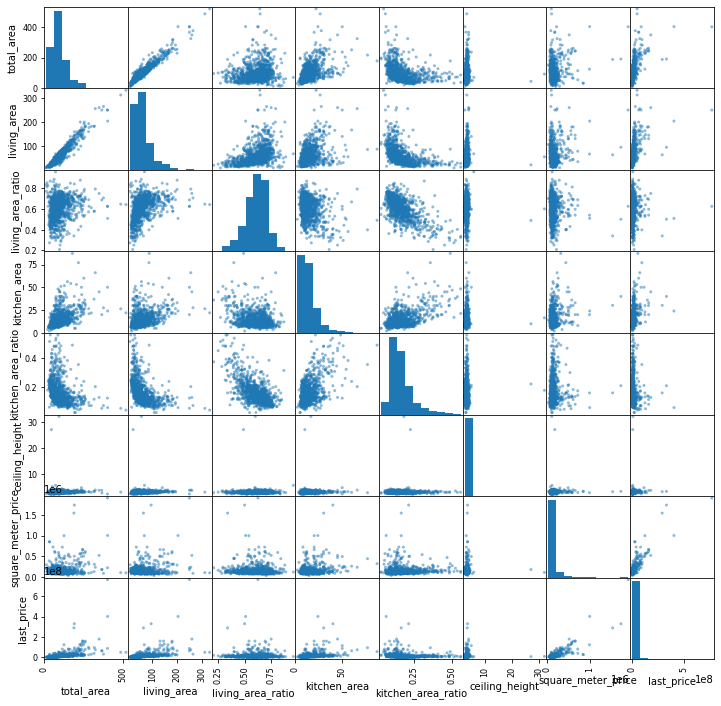

In [96]:
#построим диаграммы рассеяния и посчитаем корреляцию

piter_for_research = real_estate_piter_center[['total_area', 'living_area', 'living_area_ratio', 'kitchen_area', 'kitchen_area_ratio', 'ceiling_height', 'square_meter_price', 'last_price']]
display(piter_for_research.corr())
pd.plotting.scatter_matrix(piter_for_research, figsize=(12, 12));

</br> Несмотря на всё многообразие параметров квартир, стоимость квадрата в центре фактически от них не зависит - самая сильная корреляция только с площадью кухни (как можно жить в центре Питера без большой кухни, в которую влезает много друзей?) Что касается цены квартиры - значимая корреляция наблюдается для общей площади, площади жилой зоны и кухни, при этом коэффициенты ниже, чем по рынку в целом.
</br>

Корреляция стоимости и количества комнат: 0.00207002374239508


square_meter_price  count
rooms                           
0                131250.0      5
1                133462.0    109
2                122193.5    330
3                111764.0    347
4                105883.0    190
5                101993.5    102
6                 95437.0     40
7                119569.0     24
8                116056.0      5
9                220000.0      1
11               132639.5      2
14               116784.0      1
19                86091.0      1

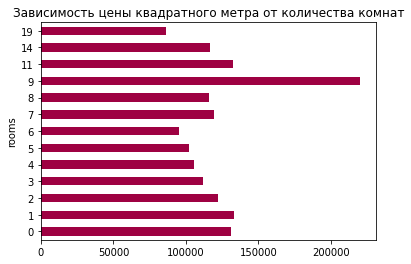

In [97]:
#посчитаем корреляцию и стоимость для предложений с разным количеством комнат

print('Корреляция стоимости и количества комнат:', real_estate_piter_center['rooms'].corr(real_estate_piter_center['square_meter_price']))
rooms_data = real_estate_piter_center.pivot_table(index='rooms', values='square_meter_price', aggfunc=['median', 'count'])
rooms_data.columns = ['square_meter_price', 'count']
display(rooms_data)
rooms_data['square_meter_price'].plot(kind='barh', colormap=cmap, title='Зависимость цены квадратного метра от количества комнат');

</br> Судя по коэффициенту корреляции, зависимости между количеством комнат и стоимостью нет. Однако на графике можно заметить тренд на уменьшение цены с с ростом комнат от 1 до 6-ти.
</br>

square_meter_price
floor_category                    
другой                    119148.0
первый                    107508.5
последний                 114432.0

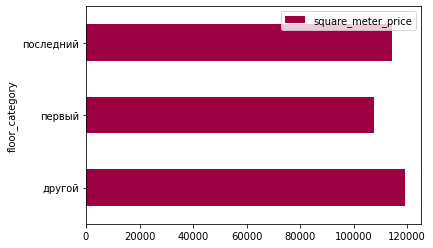

In [98]:
#изучим квартиры на разных этажах

floor_data = real_estate_piter_center.pivot_table(index='floor_category', values='square_meter_price', aggfunc='median')
display(floor_data)
floor_data.plot(kind='barh', colormap=cmap);

</br>Здесь, как и в остальном городе - первый этаж ценится меньше всего, за ним - последний, затем все остальные. Однако разница между последним этажом и "другими" уже не столь ярко выражена.</br>


Корреляция стоимости и расстояния до ближайшего парка: -0.007115975804868674


square_meter_price  count
parks_around3000                           
0.0                           109707    331
1.0                           116406    331
2.0                           116191    296
3.0                           134285    199

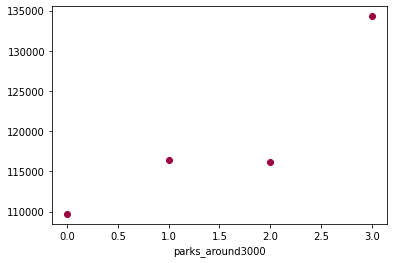

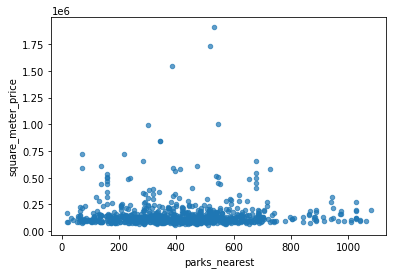

In [99]:
#оценим влияние близости парков

print('Корреляция стоимости и расстояния до ближайшего парка:', real_estate_piter_center['parks_nearest'].corr(real_estate_piter_center['square_meter_price']))
parks_data_center = real_estate_piter_center.pivot_table(index='parks_around3000', values='square_meter_price', aggfunc=['median', 'count'])
parks_data_center.columns = ['square_meter_price', 'count']
display(parks_data_center)
parks_data_center['square_meter_price'].plot(style='o', colormap=cmap);
real_estate_piter_center.plot(x='parks_nearest', y='square_meter_price', kind='scatter', alpha=0.7);

Корреляция стоимости и расстояния до ближайшего водоёма/реки: -0.062410008000139655


square_meter_price  count
ponds_around3000                           
0.0                         110040.5    160
1.0                         118085.0    359
2.0                         116056.0    177
3.0                         117142.0    461

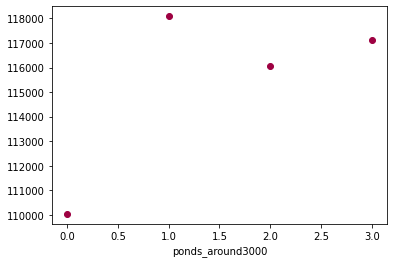

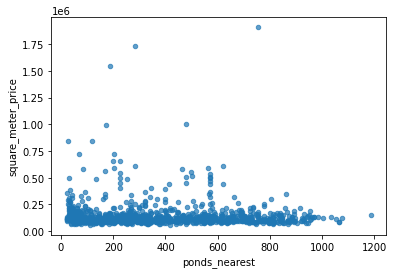

In [100]:
print('Корреляция стоимости и расстояния до ближайшего водоёма/реки:', real_estate_piter_center['ponds_nearest'].corr(real_estate_piter_center['square_meter_price']))
ponds_data_center = real_estate_piter_center.pivot_table(index='ponds_around3000', values='square_meter_price', aggfunc=['median', 'count'])
ponds_data_center.columns = ['square_meter_price', 'count']
display(ponds_data_center)
ponds_data_center['square_meter_price'].plot(style='o', colormap=cmap);
real_estate_piter_center.plot(x='ponds_nearest', y='square_meter_price', kind='scatter', alpha=0.7);

</br> Квартиры, расположенные рядом с парками, водоёмами и реками стоят дороже тех, рядом с которыми парков и рек нет. Правило "больше - лучше" тут не работает, стоимость распределяется по разному. Корреляции с расстоянием до ближайшего парка или реки нет.
</br>

Корреляция стоимости и расстояния до центра: -0.16406065760023708


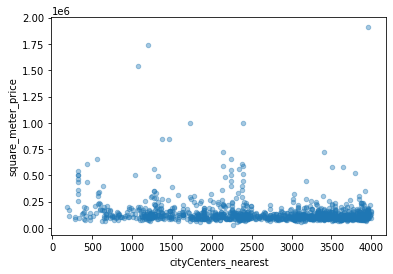

In [101]:
#есть ли в центре корреляция с расстоянием от центра? Скорее нет.

real_estate_piter_center.plot(x='cityCenters_nearest', y='square_meter_price', kind='scatter', alpha=0.4)
print('Корреляция стоимости и расстояния до центра:', real_estate_piter_center['cityCenters_nearest'].corr(real_estate_piter_center['square_meter_price']))

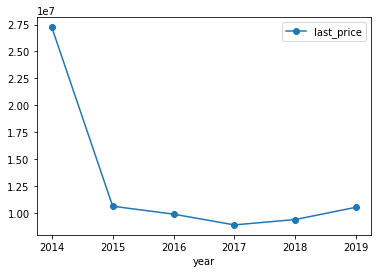

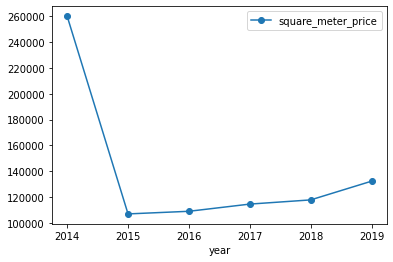

In [102]:
#есть ли зависимость стоимости от года размещения? 
#если брать среднее, то центру пришлось явно тяжелее - стоимость квартир падала до 2017 и начала расти только в 2018м
#однако средняя стоимость квадрата росла начиная с 2016.

real_estate_piter_center_year = real_estate_piter_center.groupby('year')[['square_meter_price', 'last_price']].agg('median')
real_estate_piter_center_year.plot(y='last_price', style='o-');
real_estate_piter_center_year.plot(y='square_meter_price', style='o-');

**Квартиры в самом центре - вывод:**</br>
Квартиры, расположенные в центре Санкт-Петербурга, отличаются от рынка в целом по характеристикам - они больше, в них больше комнат, выше потолки и цены. Однако в отличие от рынка в целом, стоимость гораздо меньше зависит от "измеряемых" параметров квартиры, представленных в исследовании. Справедливы, в основном, общие тренды - этаж лучше не первый и не последний, парк или река рядом с домом лучше, чем их отсутствие, большая кухня лучше, чем маленькая.</br>
Видимо, когда речь идёт о квартирах в центре, роль начинают играть трудно измеряемые факторы, такие как историческая ценность места, вид из окна, атмосфера, удобство простой ежедневной жизни.</br>

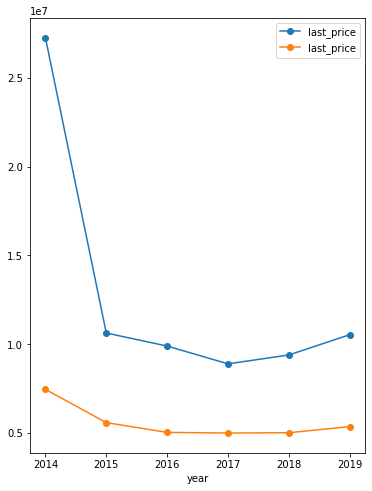

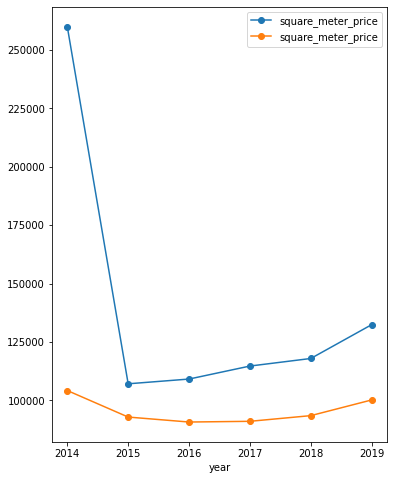

In [103]:
ax1 = real_estate_piter_center_year.plot(y='last_price', style='o-', figsize=(6, 8));
ax2 = real_estate_piter_center_year.plot(y='square_meter_price', style='o-', figsize=(6, 8));

exposition_time_year.plot(y='last_price', style='o-', ax=ax1);
exposition_time_year.plot(y='square_meter_price', style='o-', ax=ax2);

## Общий вывод

В данном исследовании был рассмотрен рынок жилой недвижимости Санкт-Петербурга и Ленинградской области и факторы, влияющие на стоимость квартир.
- Изучены данные о продажах недвижимости в период с ноября 2014 по декабрь 2019 года, выявлены аномальные и пропущенные значения.</br>
- Откорректированы типы данных, заполнены пропуски. Мы обнаружили, что заполнение пропусков в дальнейшем может привести к возникновению упорядоченных структур на графиках.
- Мы изучили следующие параметры: площадь, число комнат, высоту потолков, цену. Построили гистограммы. 
- Распределение цены и площади по форме близко к логарифмически-нормальному распределению, числа комнат - к распределению Пуассона, цены квадратного метра  - к нормальныму распределению.
- Типичная "медианная" квартира для этого региона - двушка с общей площадью около 45 кв.м. и стандартными потолками 2,65 м. и стоимостью 4.300.000 рублей
- Половина квартир продается примерно за три месяца и меньше. Если продажа заняла мене 45 дней, её можно считать быстрой. Если она длится 230 дней и более - это слишком долгая продажа. Пик продаж на 45й день от размещения может быть связан как с особенностями деятельности риэлторов, так и с окончанием бесплатного периода публикации объявления, после которого оно снимается.
- Были убраны редкие и выивающиеся значения, которые составили около 10% датафрейма
- Были изучены факторы, влияющие на стоимость квадратного метра: наибольшее влияние имеет удаленность квартиры от центра. Увеличивают стоимость высокие потолки, большие кухни и наличие парков и водоёмов в пешей доступности. Самый дорогой "квадрат" - в однокомнатных квартирах, с ростом числа комнат он падает. При этом для многокомнатных квартир, в отличие от однушек, стоимость квадратного метра растёт с увеличением размера квартиры. Снижает стоимость квартиры расположение на первом этаже и в меньшей степени - на последнем.
- В 2016м году стоимость недвижимости слегка упала год на год, затем начала активно расти.
- Мы изучили стоимость жилья в 10 населённых пунктах с наибольшим числом объявлений. Самое дорогое жильё - в Санкт-Петербурге и Пушкине, самое дешёвое - в Выборге.
- Была найдена область, которая входит в центр, выделен сегмент квартир в этом центре, изучены их параметры. Мы выяснили, что жильё в центре имеет в основном 2-3 комнаты, бОльшую площадь, чем в среднем по Петербургу, а также заметно более высокие потолки. Для них удаленность от географического центра и высота потолков уже не влияют на стоимость - квартира и в центре, потолки и так высокие. А вот коэффициент корреляции с размером кухни стал выше, чем в среднем по Петербургу и области. Меньше заметно положительное влияние парков и водоёмов, а также отрицательное влияние расположения на первом этаже. Цена последнего этажа и "других" этажей также различается намного меньше. А вот число комнат стало влиять на стоимость больше. 
